In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from  sklearn.preprocessing import LabelEncoder
from  sklearn.preprocessing import OneHotEncoder
import scipy 
from scipy.sparse import coo_matrix, hstack

from __future__ import division
from scipy.special import erfinv

In [2]:
df_train = pd.read_csv("../data/features_train.csv")
df_test = pd.read_csv("../data/features_test.csv")

In [3]:
df_labels = pd.read_csv("../data/labels_train.csv" , header = None )

In [4]:
labels_train = df_labels[1].values

In [5]:
df_train = df_train.drop( ["SK_ID_CURR"] , axis = 1 ) 
test_ids = df_test["SK_ID_CURR"].values
df_test = df_test.drop( ["SK_ID_CURR"] , axis = 1 ) 

In [6]:
df_test.shape

(48744, 307)

In [7]:
features_train_num = df_train.select_dtypes(include=[np.number])
features_test_num = df_test.select_dtypes(include=[np.number])
features_train_cat =df_train.select_dtypes(include=[object])
features_test_cat = df_test.select_dtypes(include=[object])

In [8]:
cats_not_doc = [ x for x in features_train_num.columns if not x.startswith("FLAG_DOCUMENT")]
features_train_num = features_train_num[ cats_not_doc ]
features_test_num = features_test_num[ cats_not_doc ]

In [9]:
not_flags = [ x for x in features_train_num.columns if  not x.startswith("FLAG")]
flags = [ x for x in features_train_num.columns if x.startswith("FLAG")]

new_cats_train = features_train_num[ flags ]
new_cats_test = features_test_num[ flags ]

features_train_num = features_train_num.drop( flags , axis = 1 )
features_test_num = features_test_num.drop( flags , axis = 1 )

features_train_cat = pd.concat( [features_train_cat  , new_cats_train ]  , axis = 1 )
features_test_cat = pd.concat( [features_test_cat , new_cats_test] , axis = 1  )


features_train_num.head()


,LIVINGAPARTMENTS_MODE,REGION_RATING_CLIENT,EXT_SOURCE_1,APARTMENTS_MODE,REG_CITY_NOT_LIVE_CITY,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,DAYS_ID_PUBLISH,ELEVATORS_AVG,ENTRANCES_MEDI,...,MEAN(prev.CNT_PAYMENT),LAST(pos.SK_ID_PREV),MAX(card.AMT_RECIVABLE),LAST(prev.AMT_CREDIT),LAST(card.AMT_PAYMENT_CURRENT),MEAN(prev.DAYS_LAST_DUE_1ST_VERSION),MAX(card.CNT_DRAWINGS_OTHER_CURRENT),MEAN(bureau.AMT_CREDIT_SUM_DEBT),LAST(card.AMT_PAYMENT_TOTAL_CURRENT),MAX(prev.RATE_INTEREST_PRIVILEGED)
0,0.022,2,0.083037,0.0252,0,0,0,-2120,0.00,0.0690,...,24.000000,1038818.0,0.0,179055.0,0.0,125.000000,0.0,49156.2,0.0,0.0
1,0.079,1,0.311267,0.0924,0,0,0,-291,0.08,0.0345,...,10.000000,2636178.0,0.0,348637.5,0.0,-1004.333333,0.0,0.0,0.0,0.0
2,0.000,2,0.000000,0.0000,0,0,0,-2531,0.00,0.0000,...,4.000000,1564014.0,0.0,20106.0,0.0,-694.000000,0.0,0.0,0.0,0.0
3,0.000,2,0.000000,0.0000,0,0,0,-2437,0.00,0.0000,...,23.000000,2190416.0,0.0,0.0,0.0,91584.000000,0.0,0.0,0.0,0.0
4,0.000,2,0.000000,0.0000,0,1,1,-3458,0.00,0.0000,...,20.666667,1940724.0,0.0,284400.0,0.0,-837.200000,0.0,0.0,0.0,0.0


In [10]:
for col in features_train_cat.columns:
    
    df_ = pd.concat( [features_train_cat[col] , features_test_cat[col] ]   )
    
    enc = LabelEncoder()
    enc.fit( df_.values ) 
    features_train_cat[col] = enc.transform( features_train_cat[col] )
    features_test_cat[col] = enc.transform( features_test_cat[col] )
    

In [11]:
features_test_cat.head()

,NAME_INCOME_TYPE,EMERGENCYSTATE_MODE,OCCUPATION_TYPE,NAME_TYPE_SUITE,FONDKAPREMONT_MODE,FLAG_OWN_CAR,WEEKDAY_APPR_PROCESS_START,CODE_GENDER,FLAG_OWN_REALTY,NAME_FAMILY_STATUS,...,LAST(prev.NAME_PAYMENT_TYPE),LAST(prev.CHANNEL_TYPE),LAST(prev.PRODUCT_COMBINATION),LAST(prev.NAME_CONTRACT_TYPE),FLAG_PHONE,FLAG_WORK_PHONE,FLAG_EMP_PHONE,FLAG_EMAIL,FLAG_CONT_MOBILE,FLAG_MOBIL
0,7,1,0,7,0,0,5,0,1,1,...,1,5,14,2,0,0,1,1,1,1
1,7,0,10,7,0,0,0,1,1,1,...,1,5,14,2,0,0,1,0,1,1
2,7,0,5,0,0,1,1,1,1,1,...,1,8,14,2,0,0,1,0,1,1
3,7,1,15,7,3,0,6,0,1,1,...,1,5,11,2,1,0,1,0,1,1
4,7,0,0,7,0,1,0,1,0,1,...,4,5,14,2,0,1,1,0,1,1


In [12]:
features_test_cat.shape

(48744, 43)

In [13]:
#features_train_cat = features_train_cat[cats_not_doc]
#features_test_cat = features_test_cat[cats_not_doc]

In [14]:
df_ = pd.concat( [features_train_cat , features_test_cat ] , axis = 0 )
enc = OneHotEncoder()
enc.fit( df_ )
onehot_train = enc.transform( features_train_cat )
onehot_test = enc.transform( features_test_cat )

In [15]:
features_test_cat.shape

(48744, 43)

In [16]:
onehot_test.shape

(48744, 355)

In [17]:
features_train_num.shape

(307511, 244)

In [18]:
def rank_gauss(x):
    # x is numpy vector
    N = x.shape[0]
    temp = x.argsort()
    rank_x = temp.argsort() / N
    rank_x -= rank_x.mean()
    rank_x *= 2 # rank_x.max(), rank_x.min() should be in (-1, 1)
    efi_x = erfinv(rank_x) # np.sqrt(2)*erfinv(rank_x)
    efi_x -= efi_x.mean()
    return efi_x

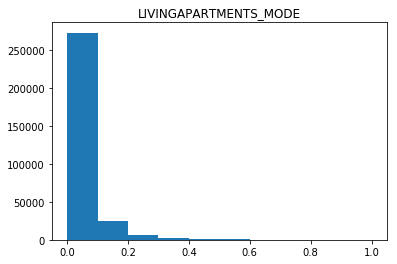

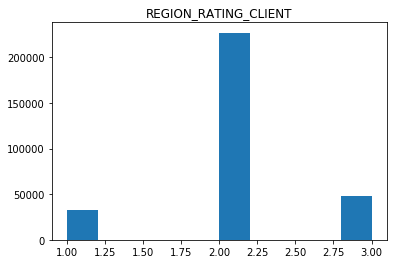

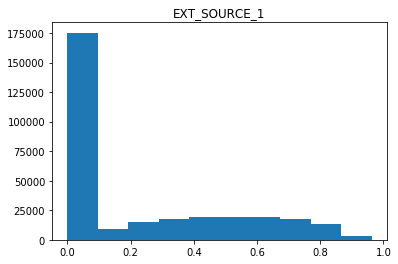

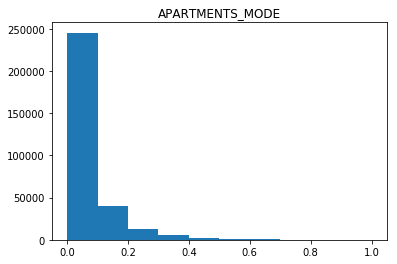

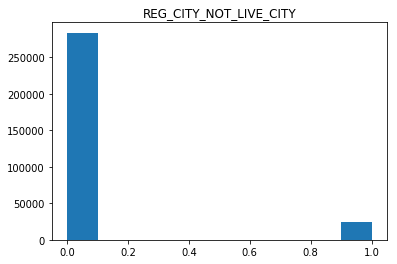

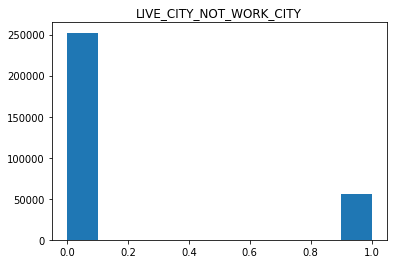

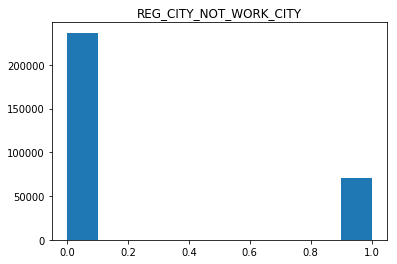

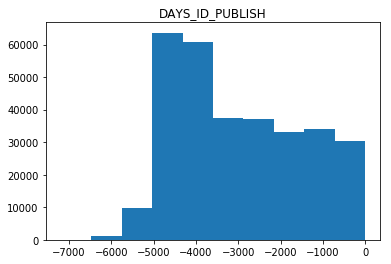

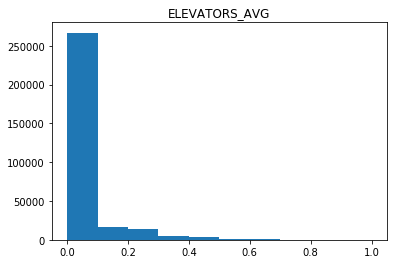

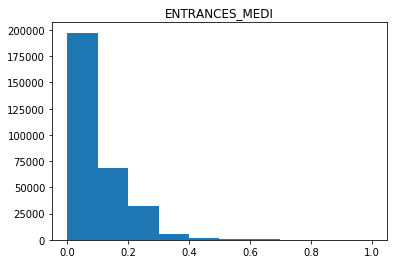

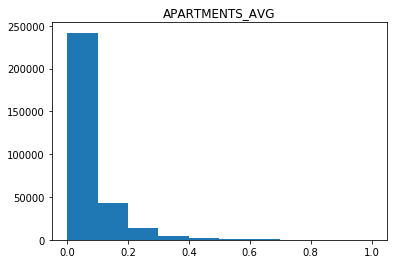

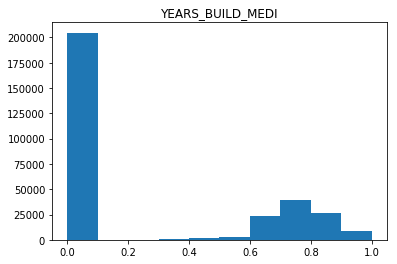

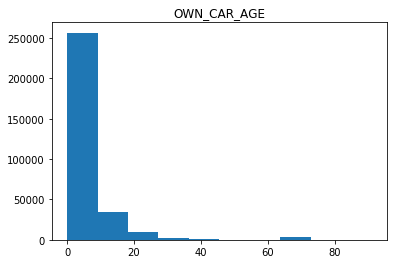

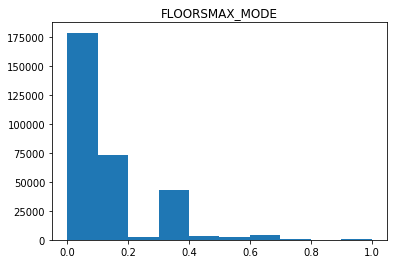

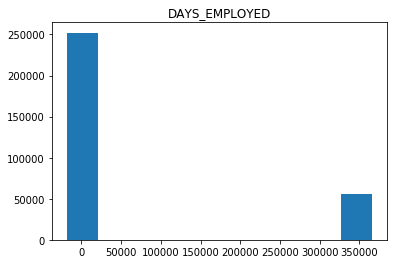

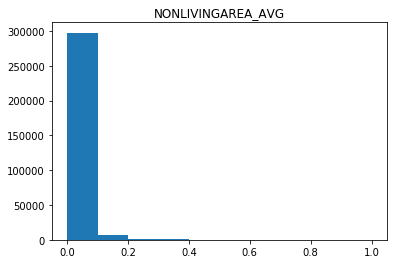

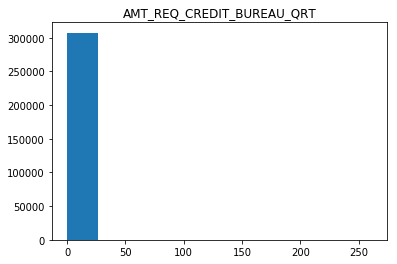

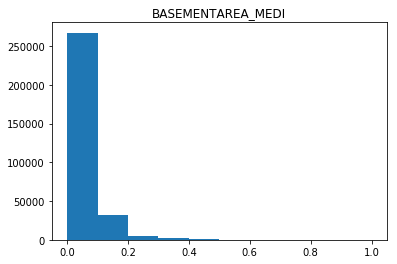

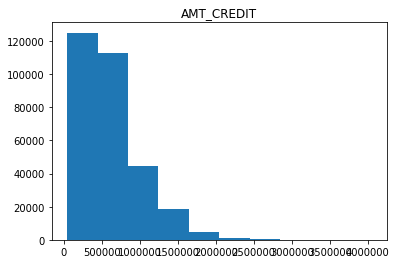

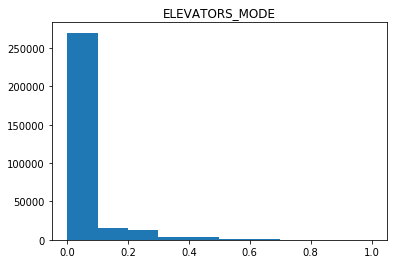

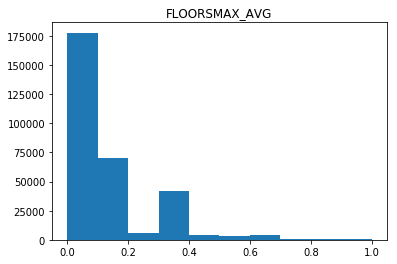

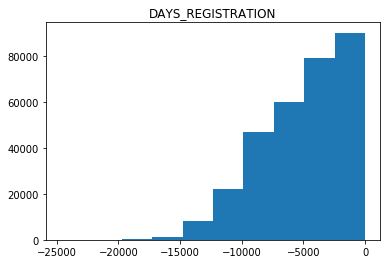

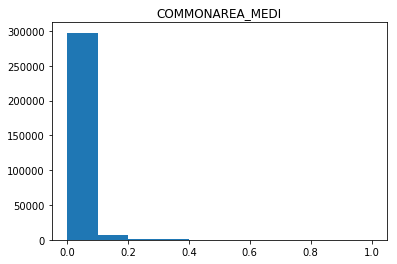

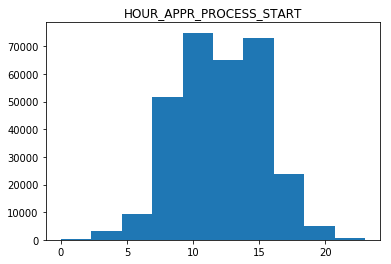

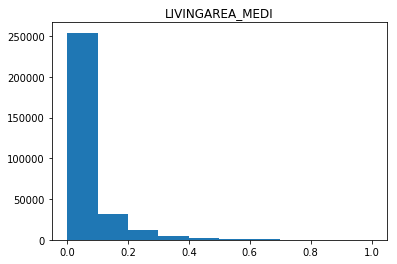

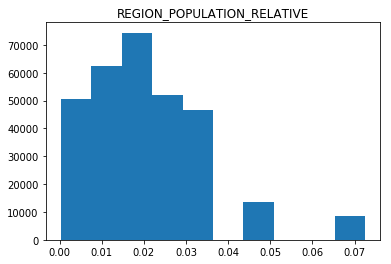

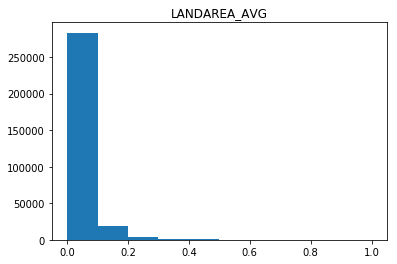

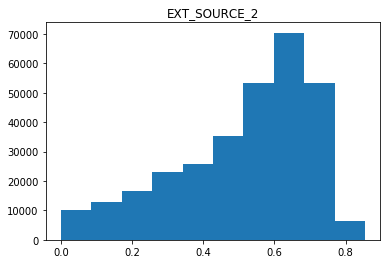

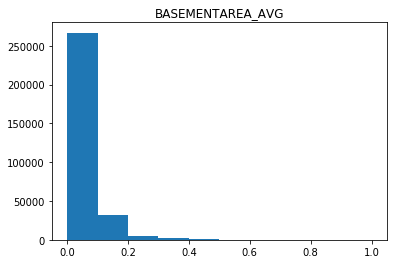

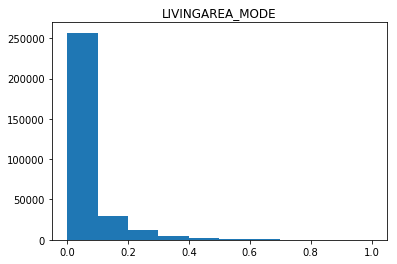

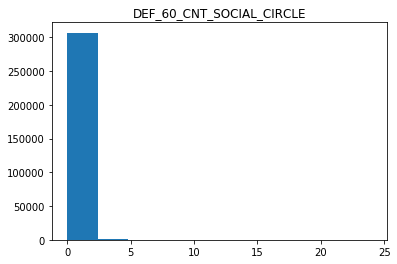

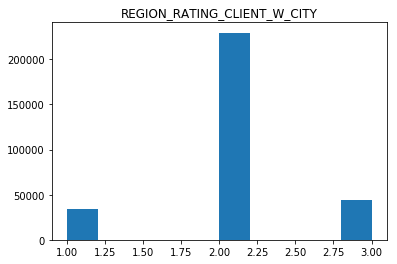

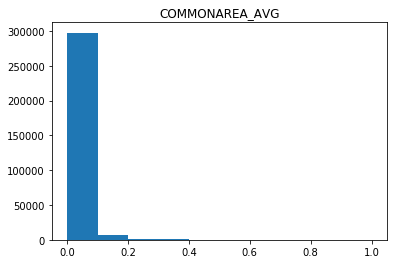

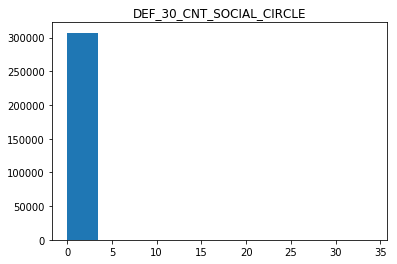

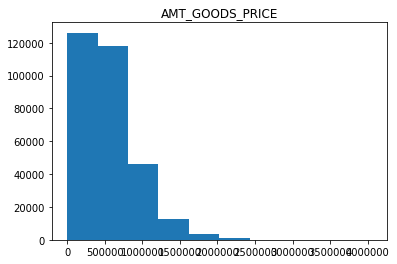

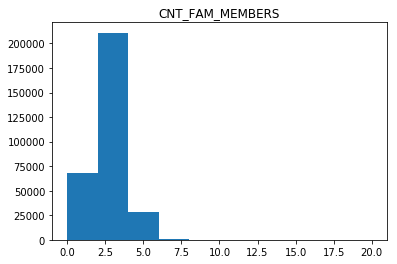

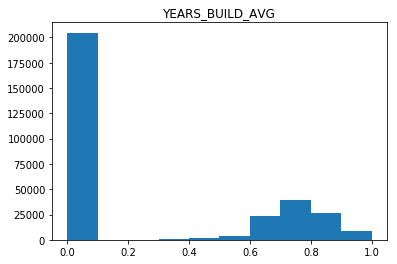

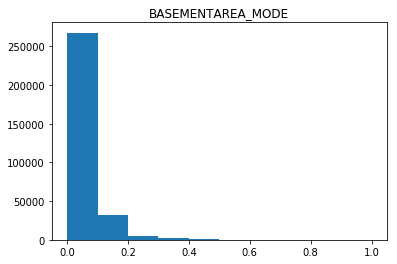

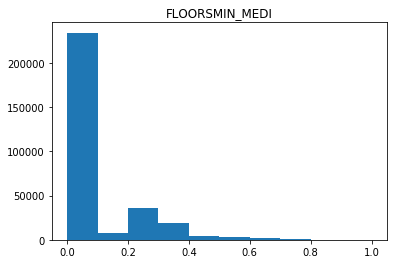

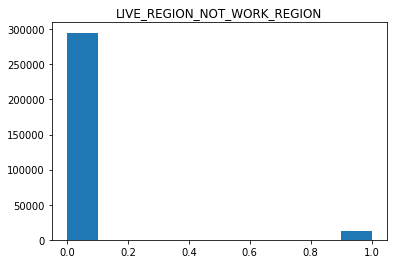

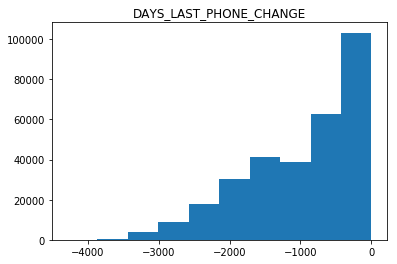

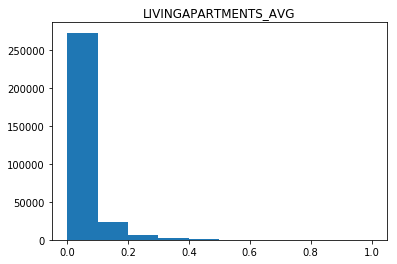

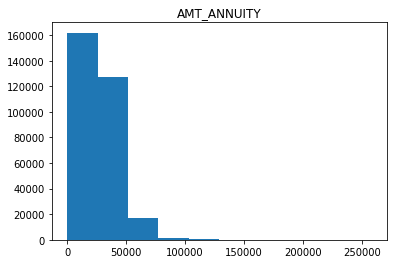

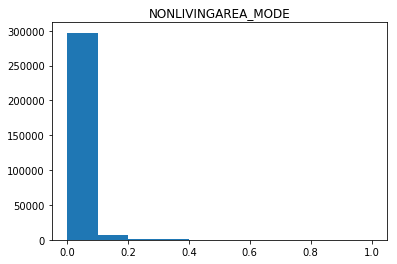

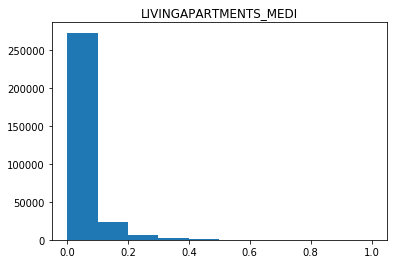

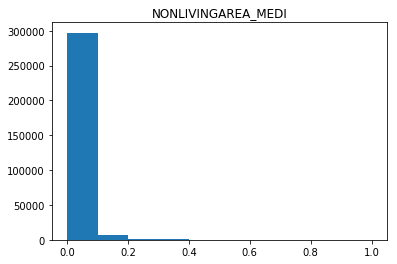

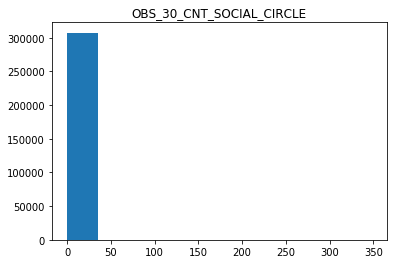

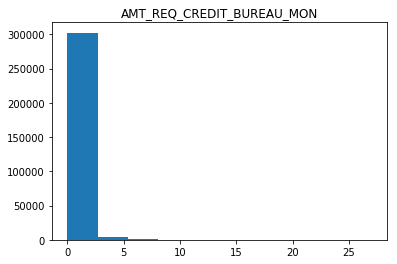

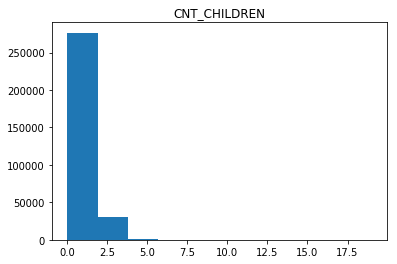

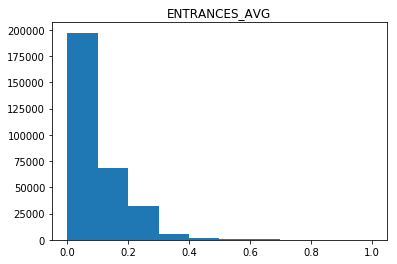

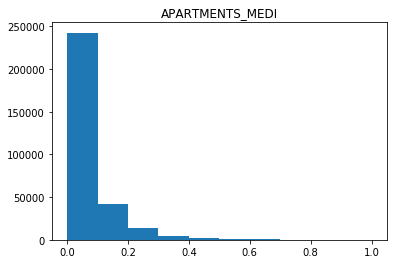

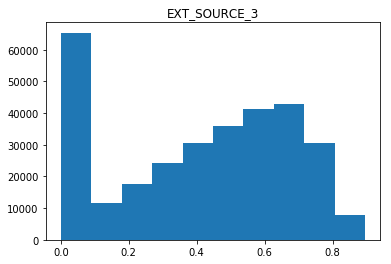

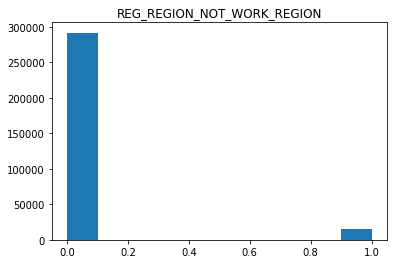

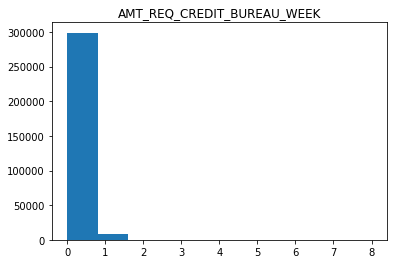

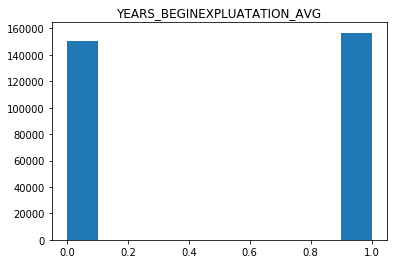

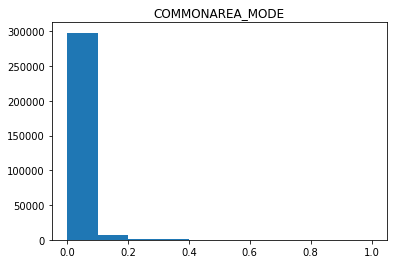

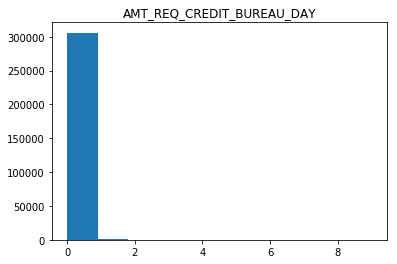

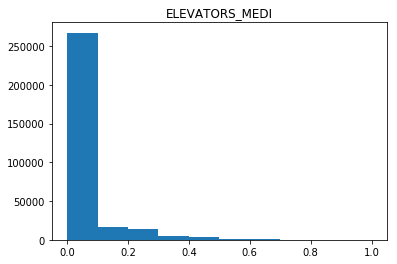

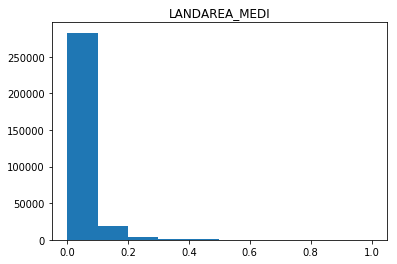

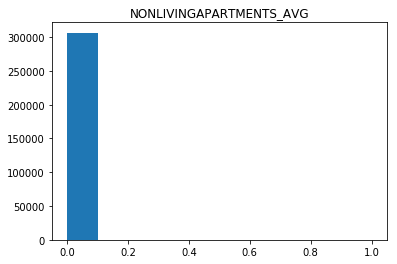

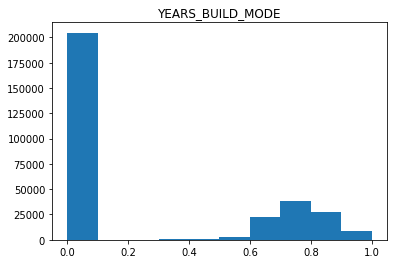

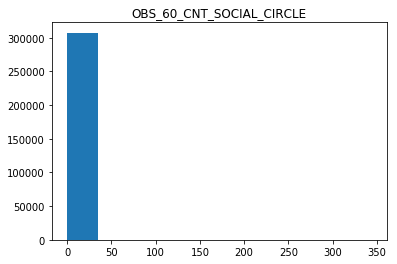

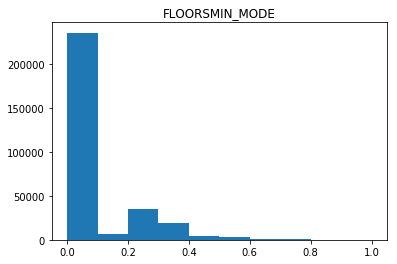

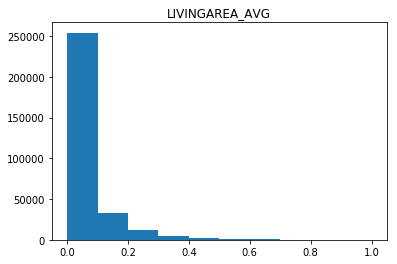

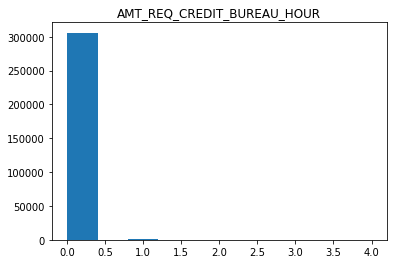

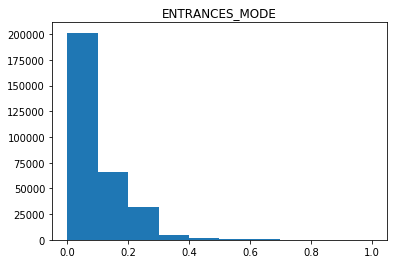

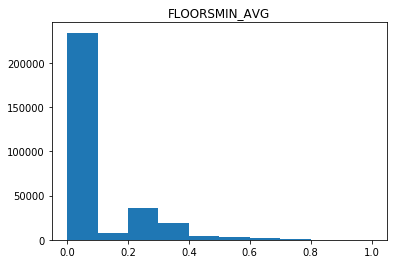

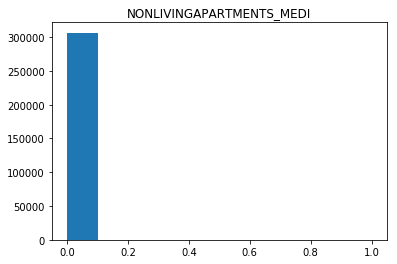

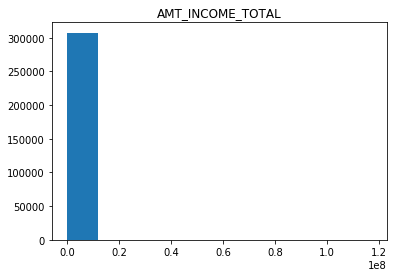

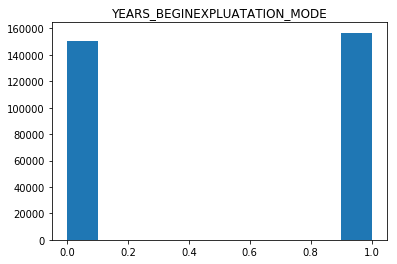

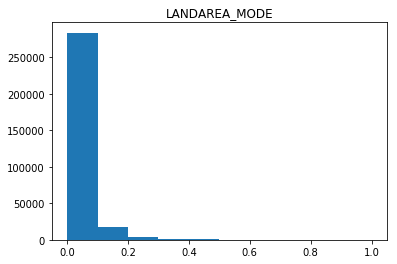

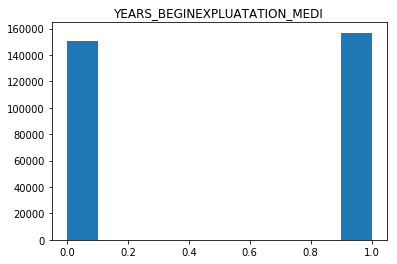

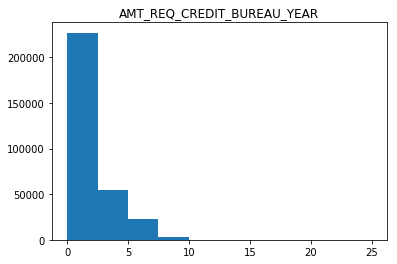

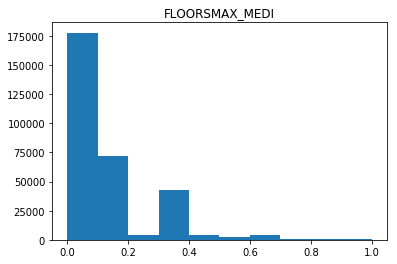

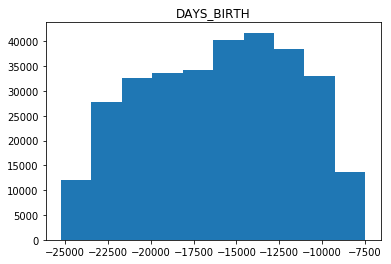

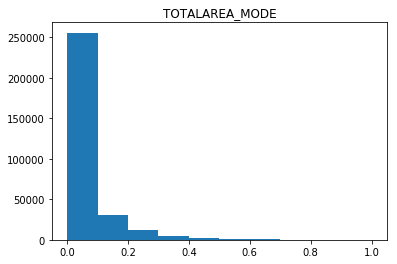

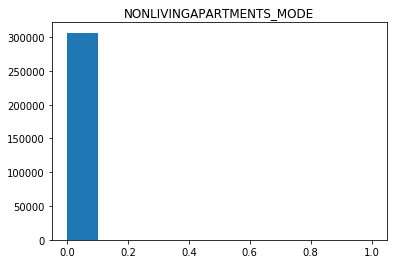

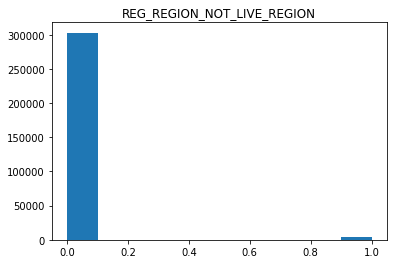

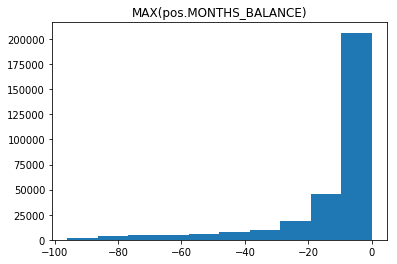

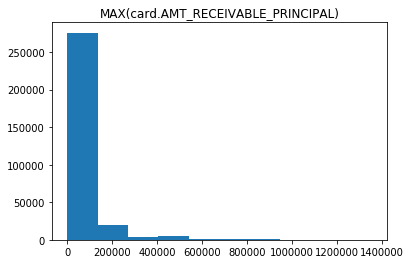

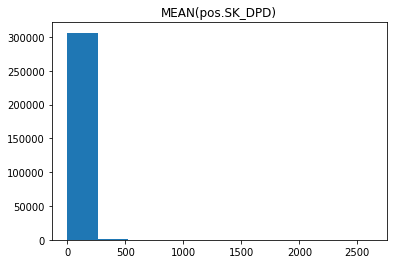

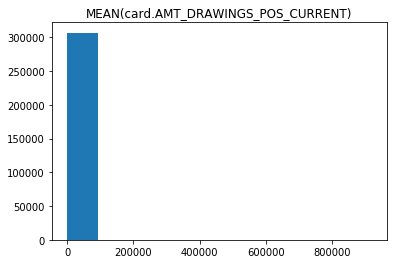

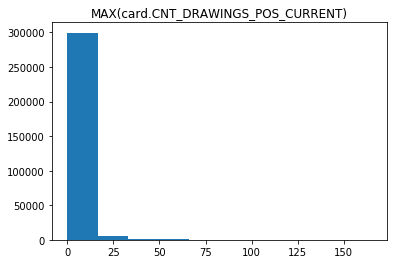

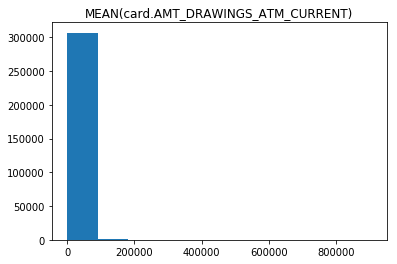

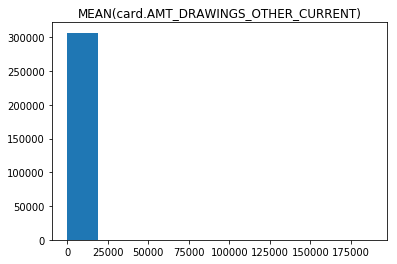

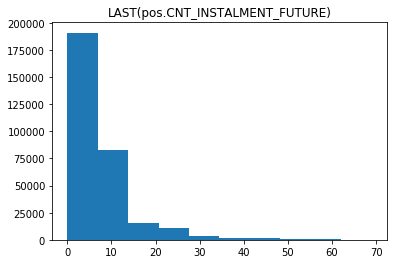

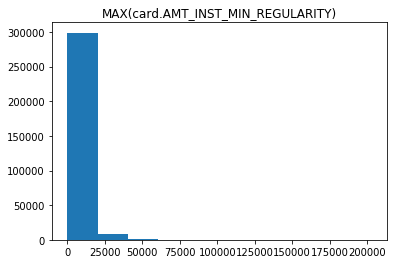

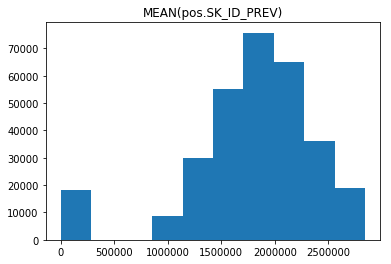

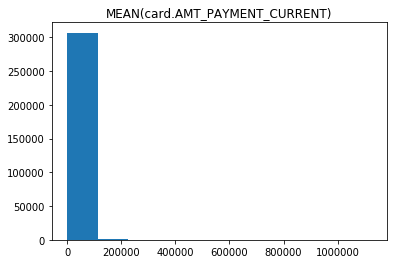

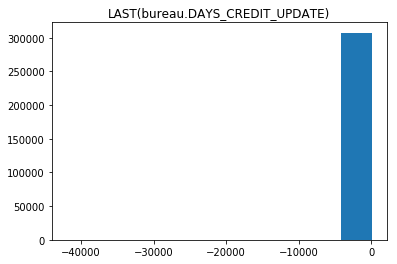

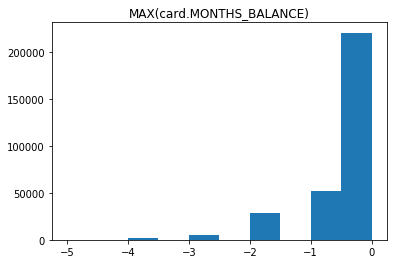

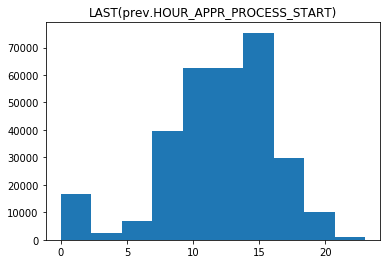

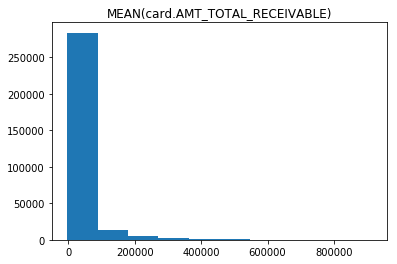

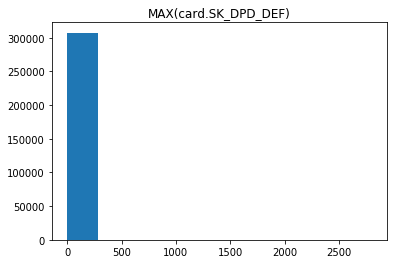

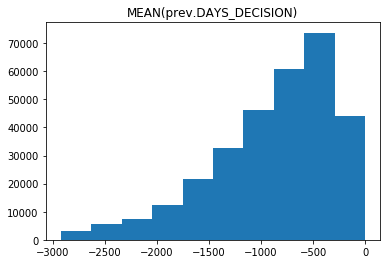

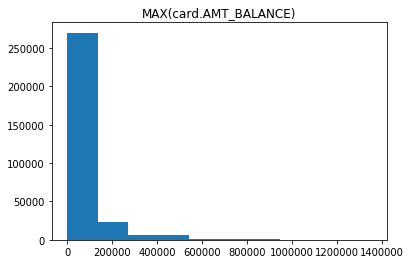

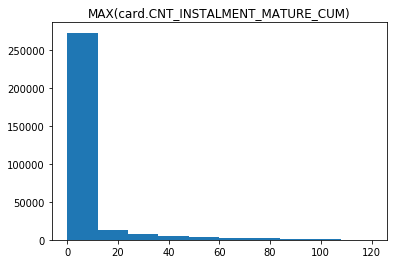

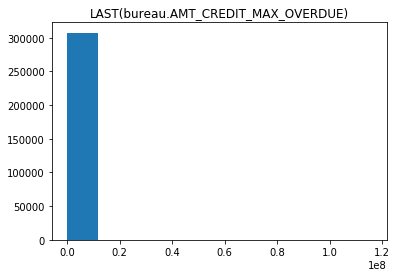

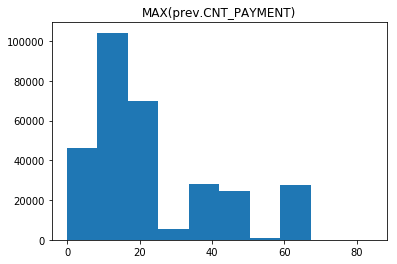

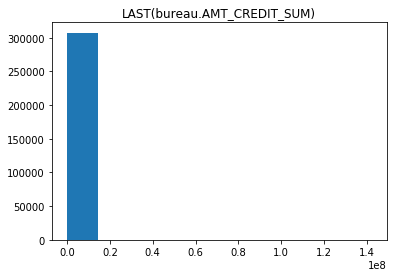

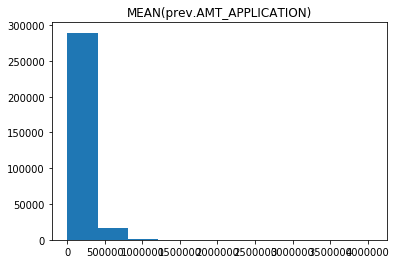

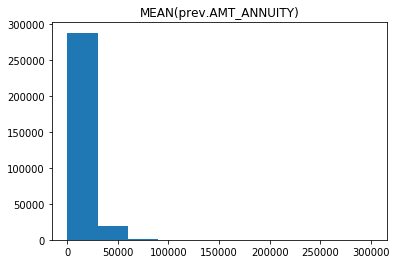

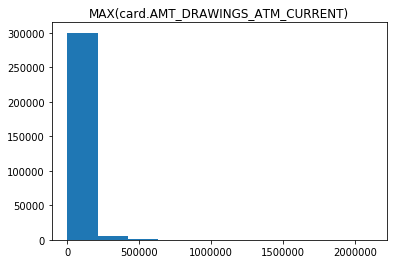

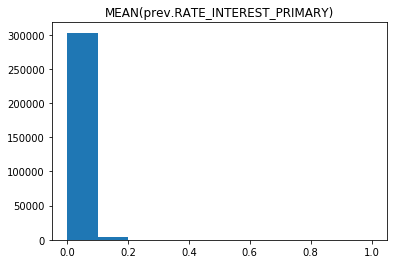

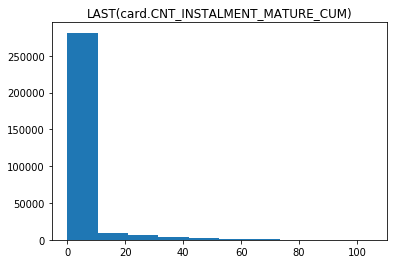

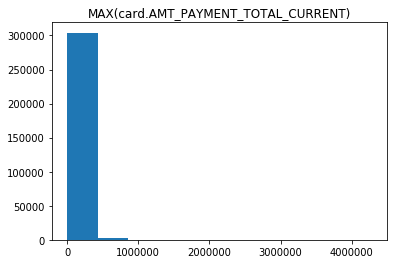

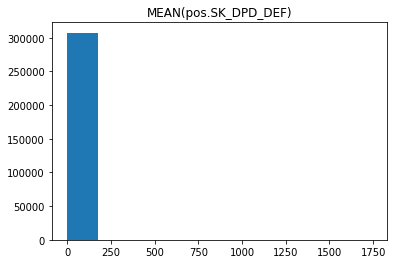

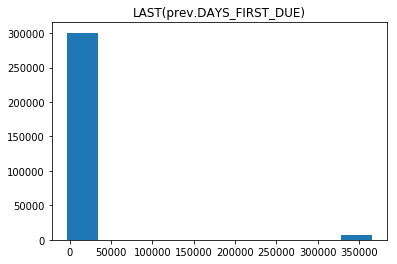

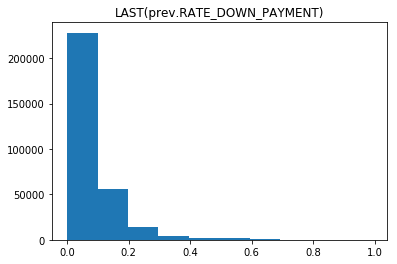

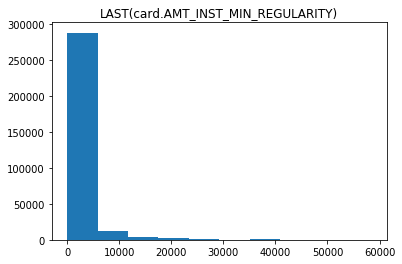

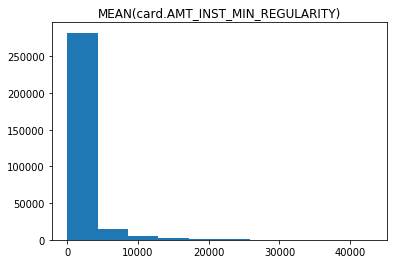

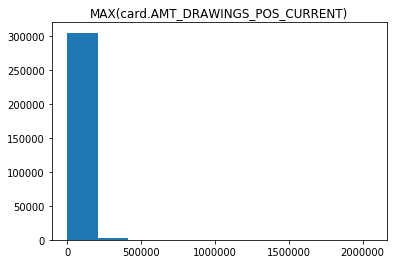

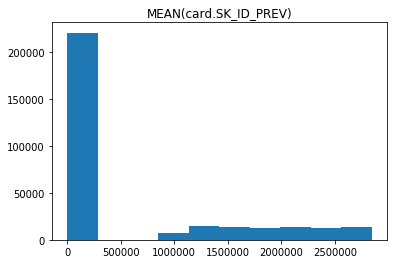

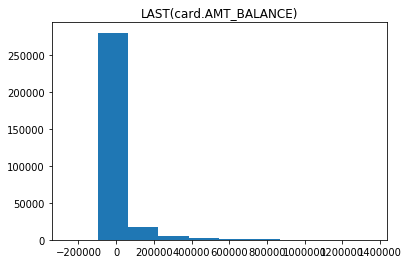

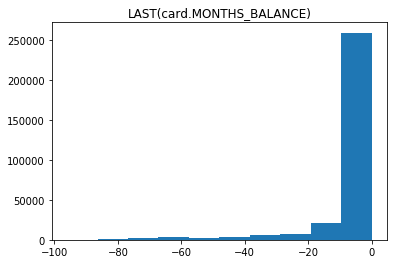

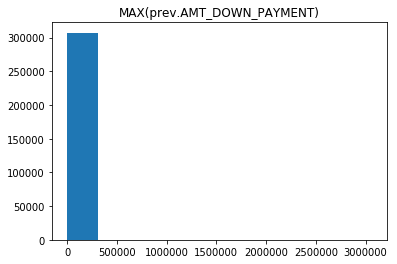

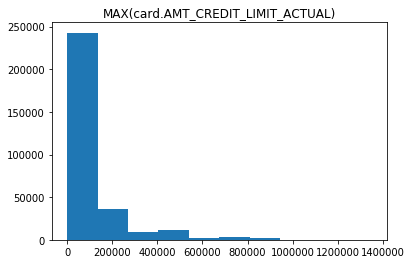

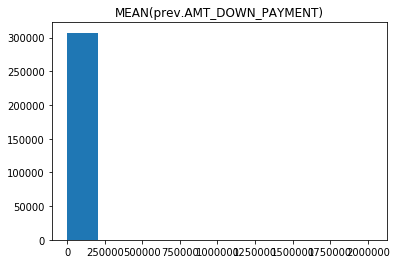

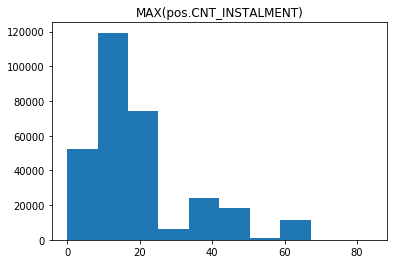

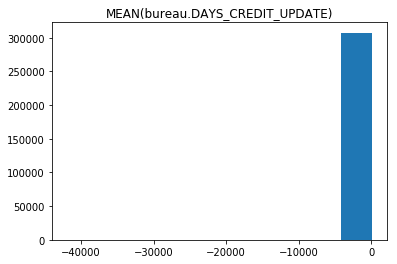

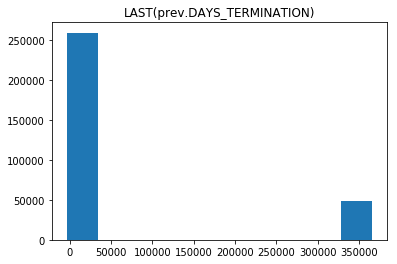

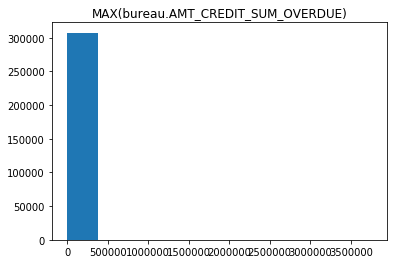

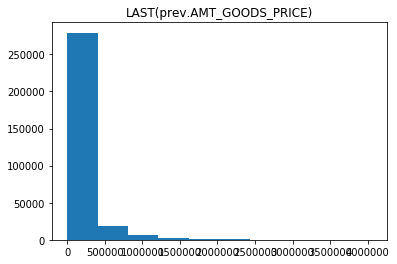

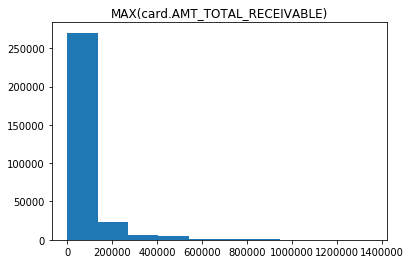

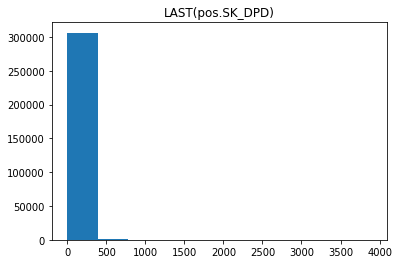

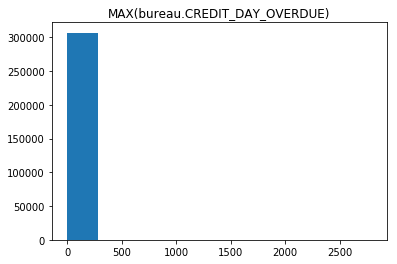

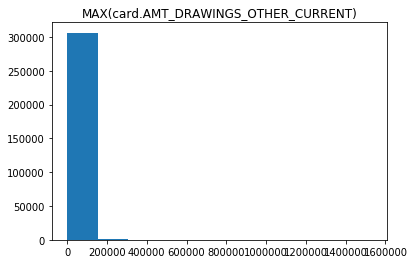

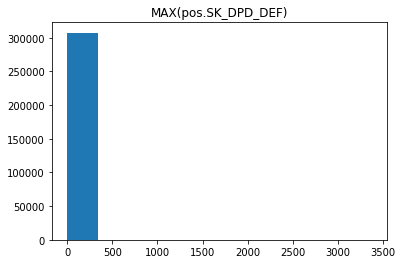

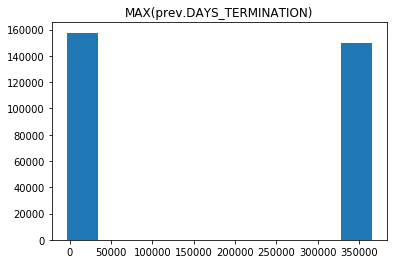

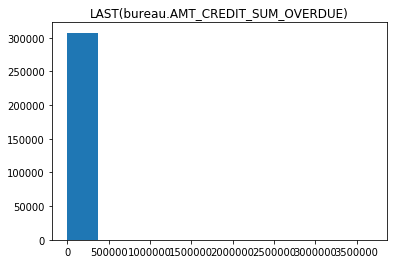

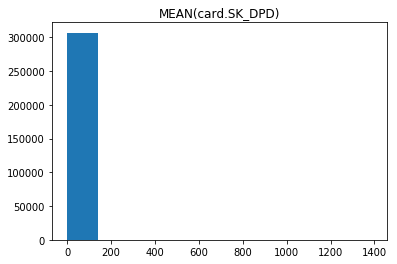

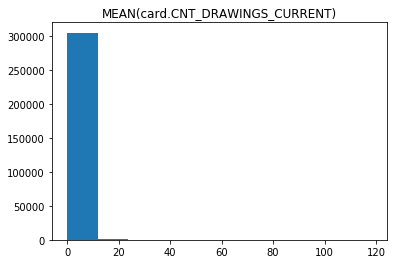

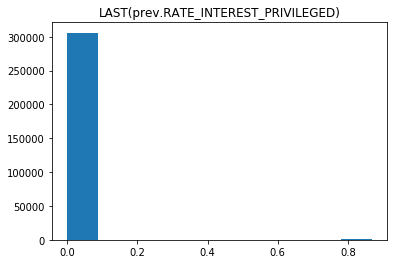

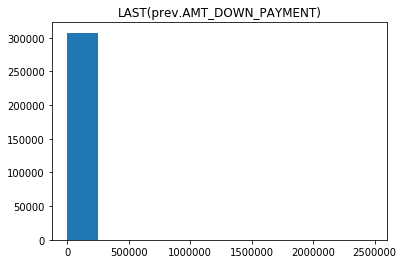

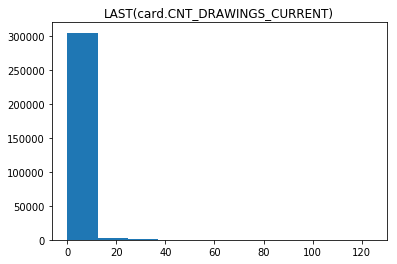

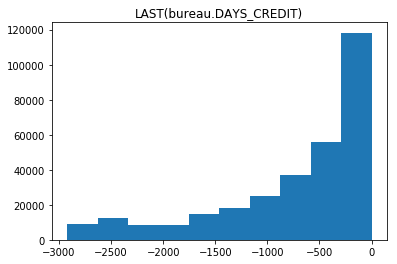

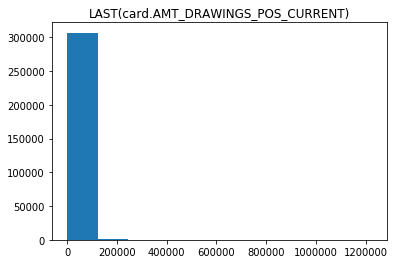

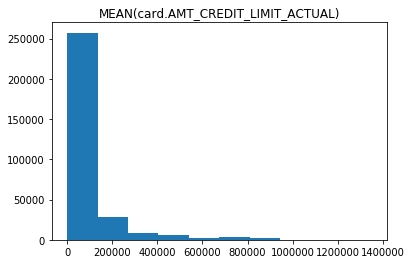

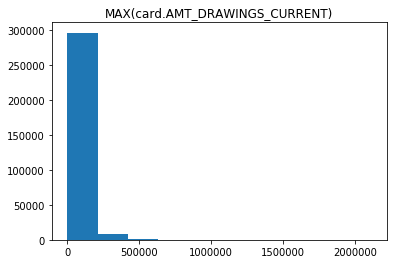

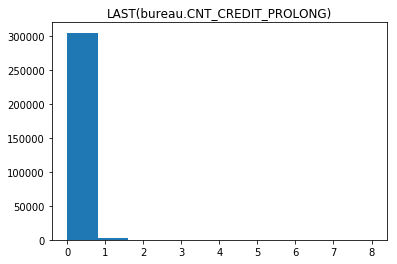

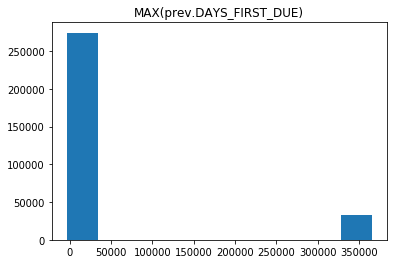

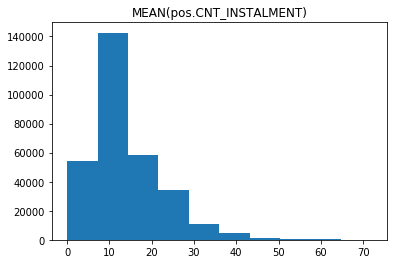

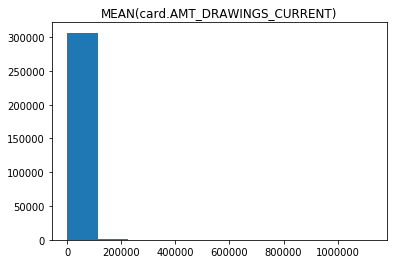

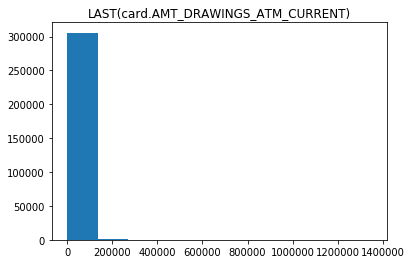

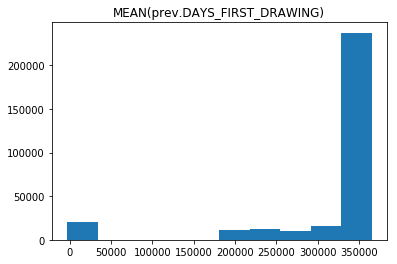

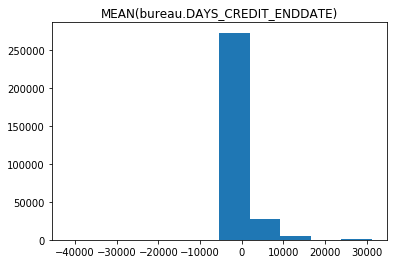

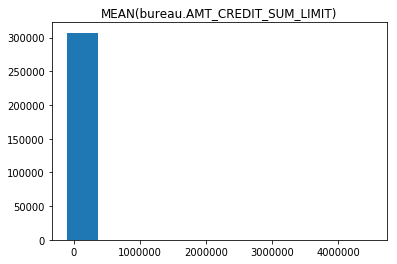

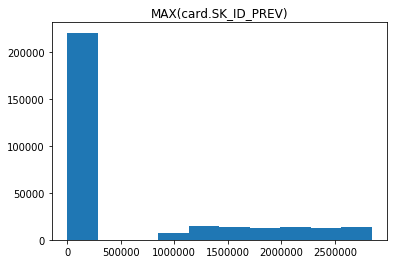

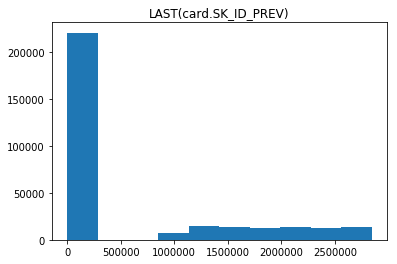

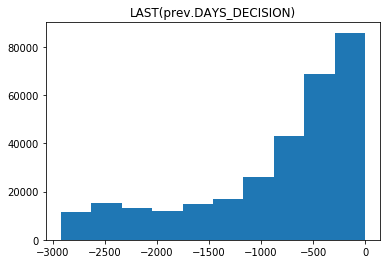

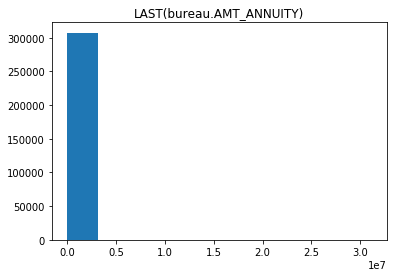

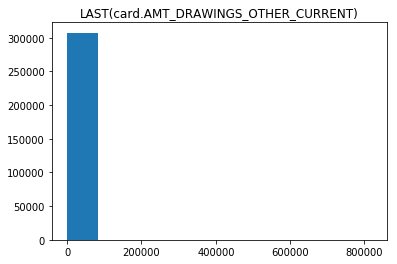

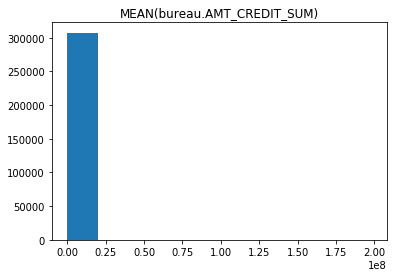

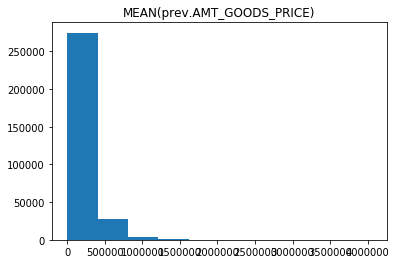

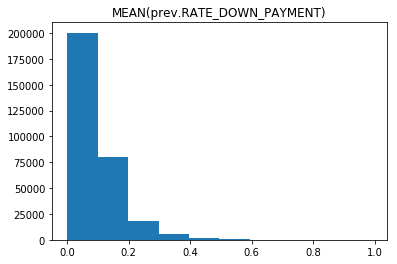

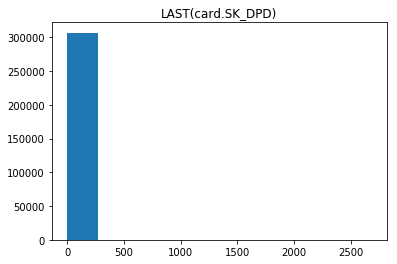

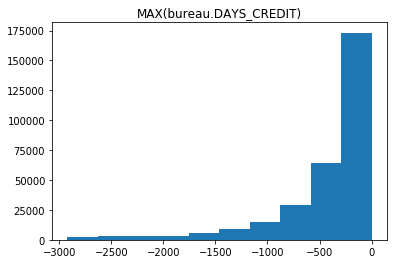

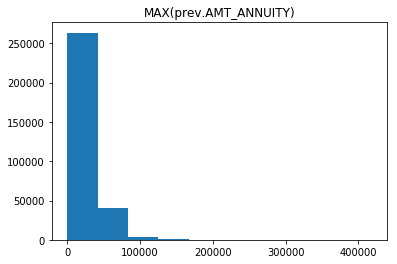

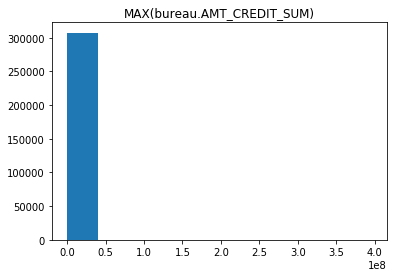

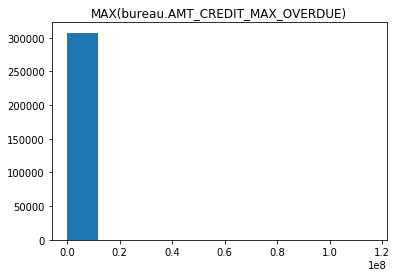

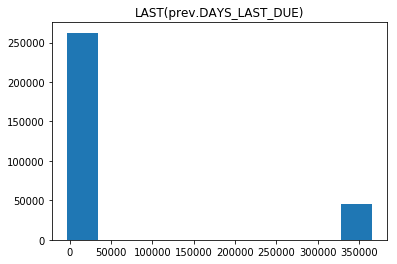

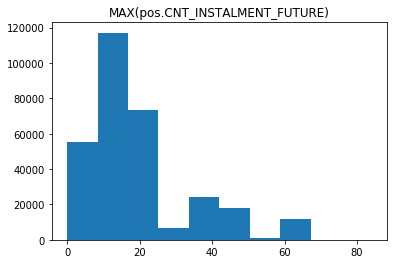

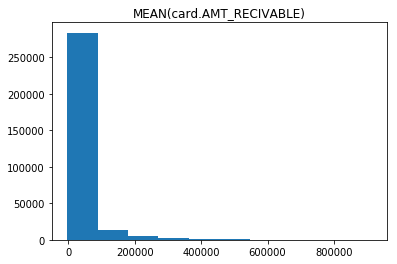

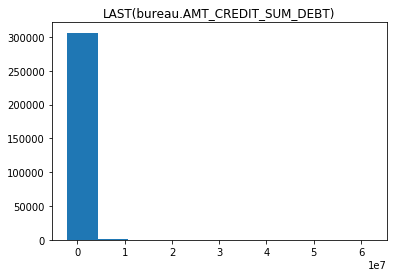

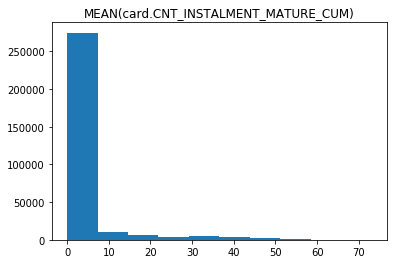

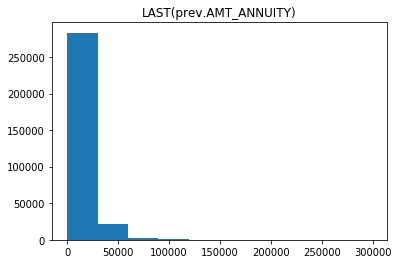

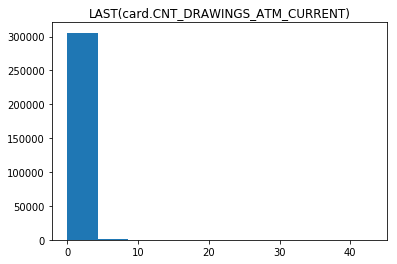

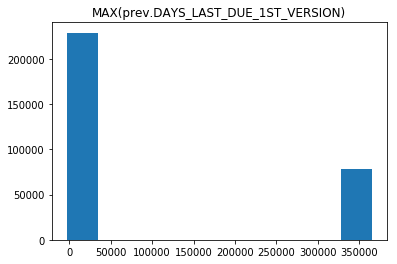

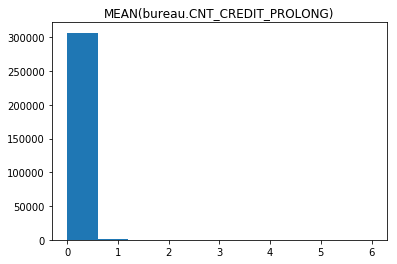

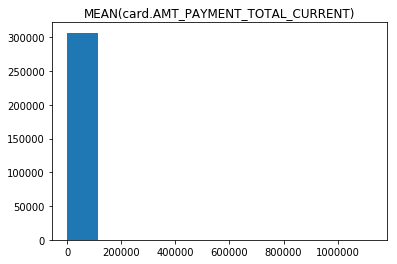

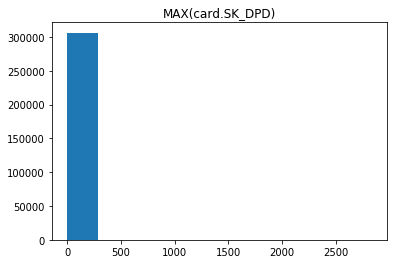

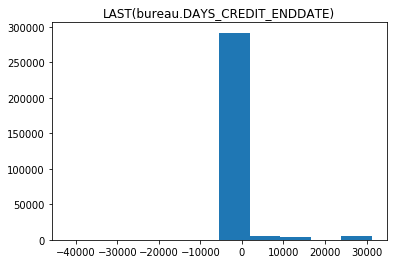

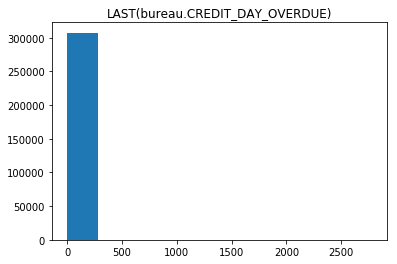

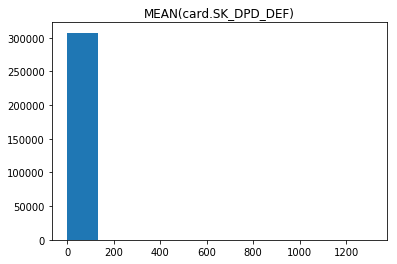

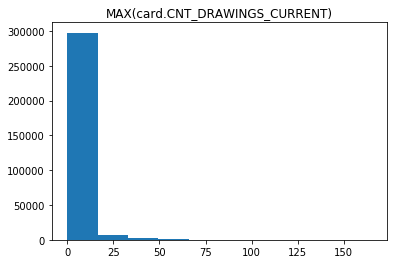

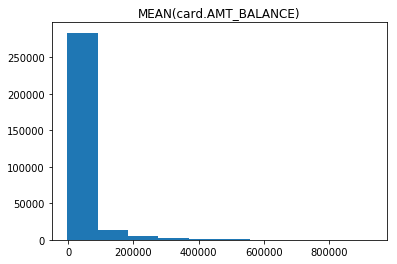

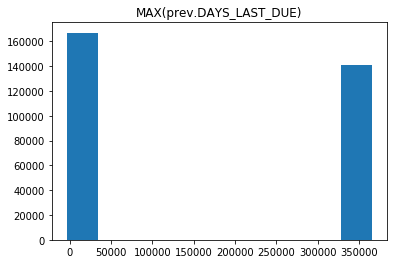

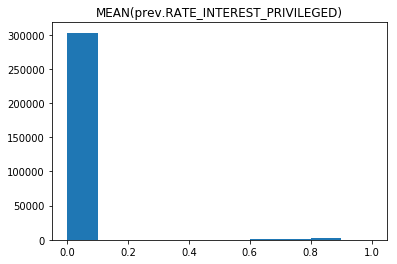

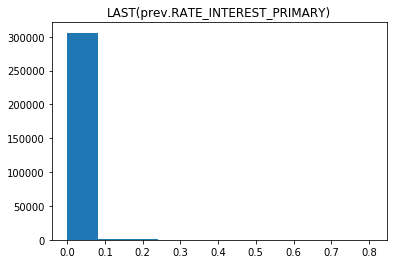

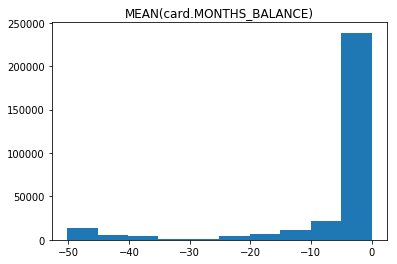

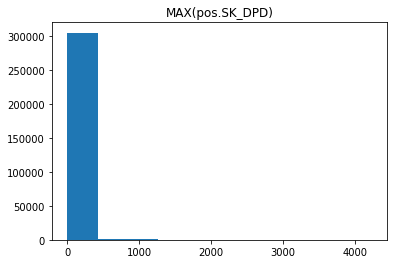

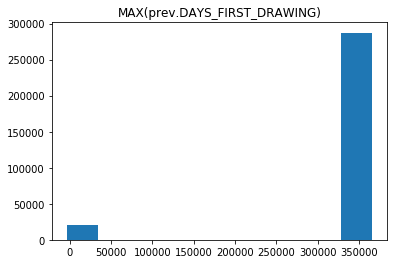

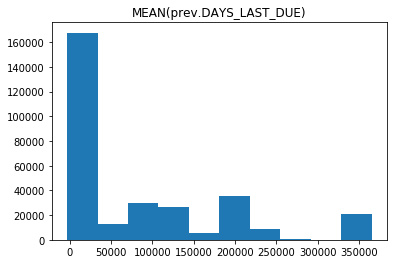

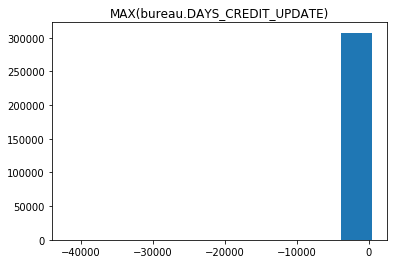

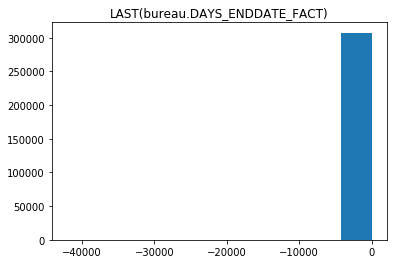

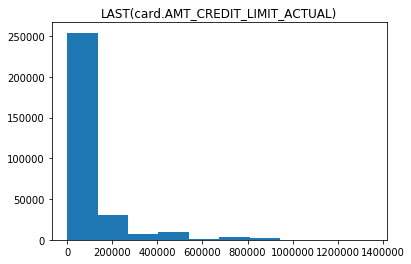

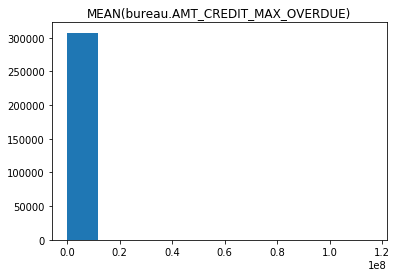

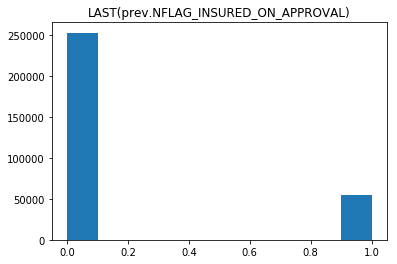

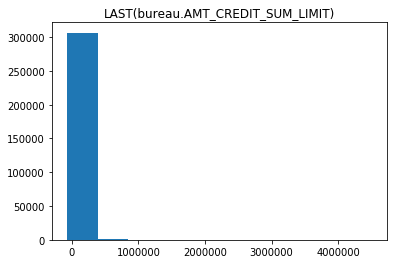

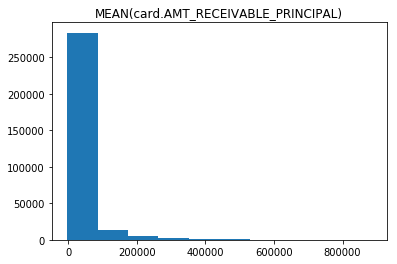

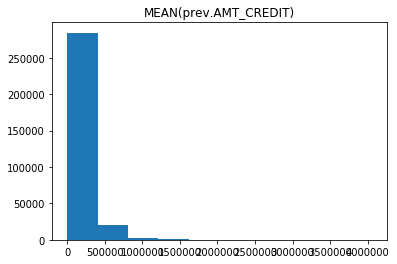

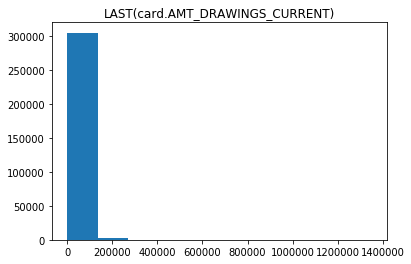

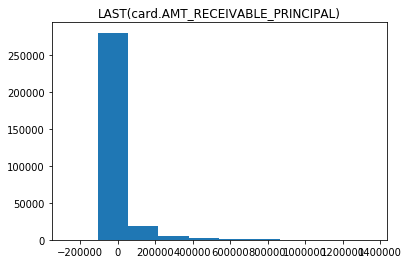

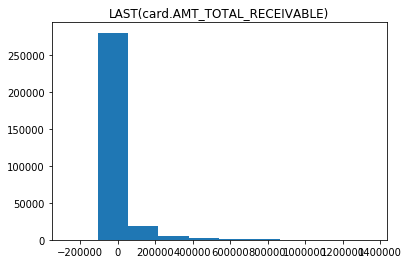

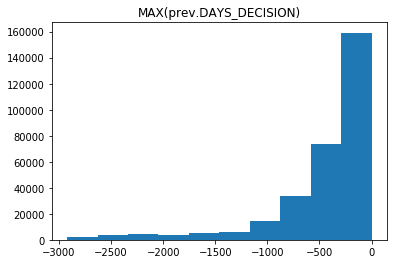

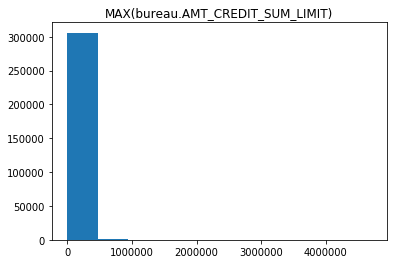

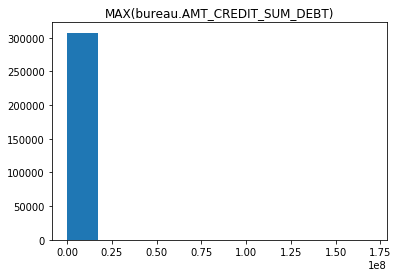

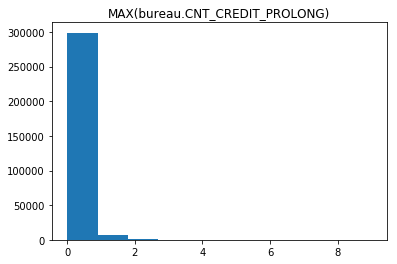

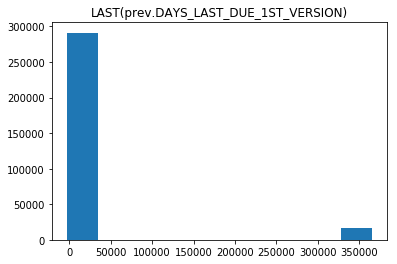

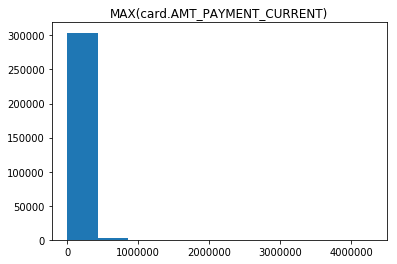

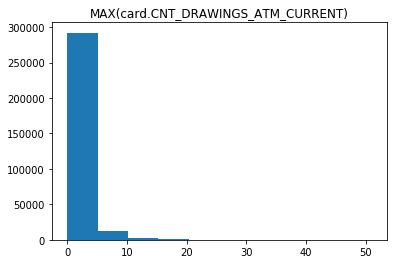

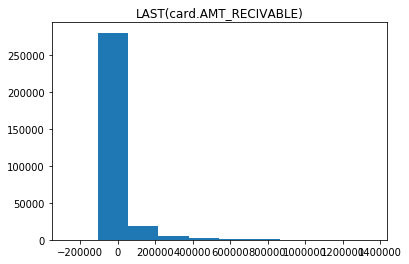

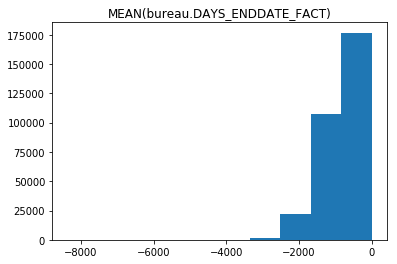

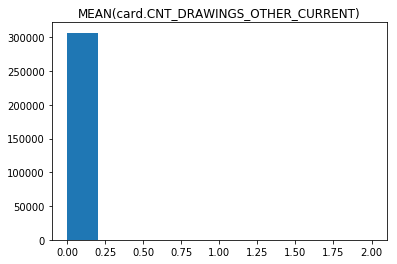

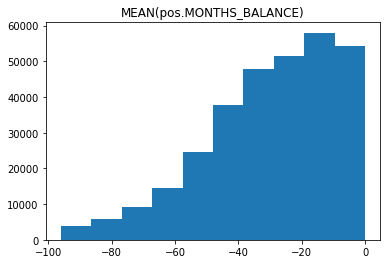

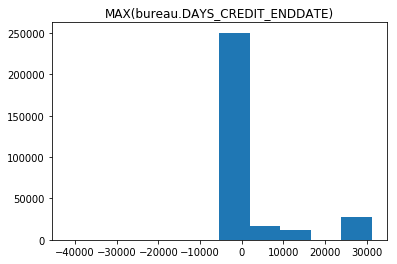

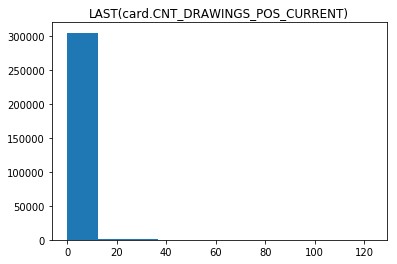

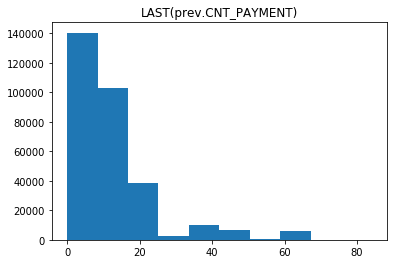

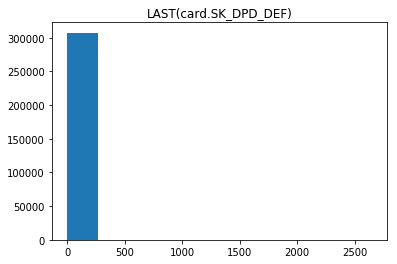

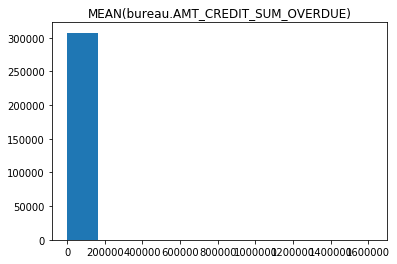

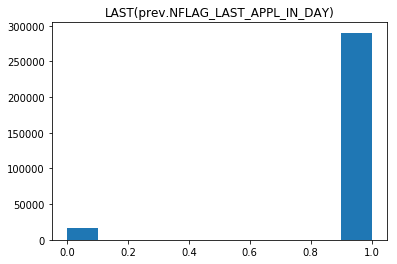

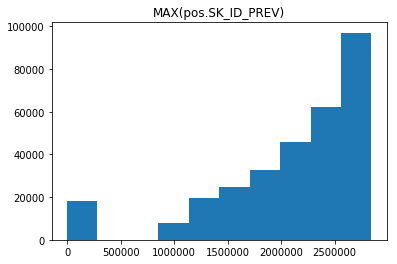

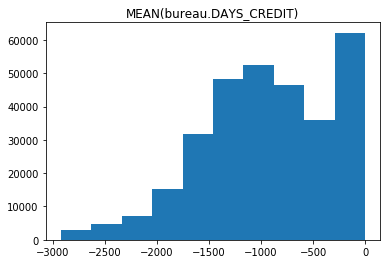

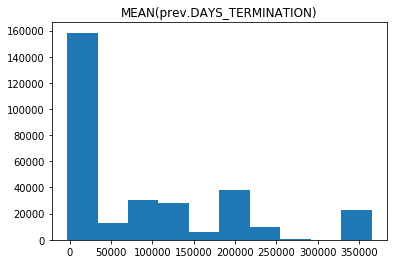

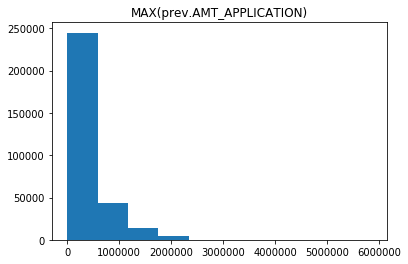

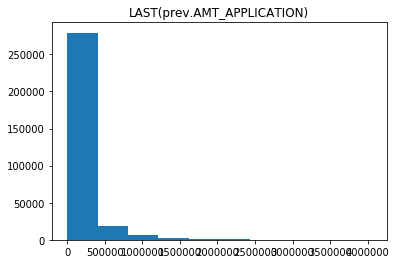

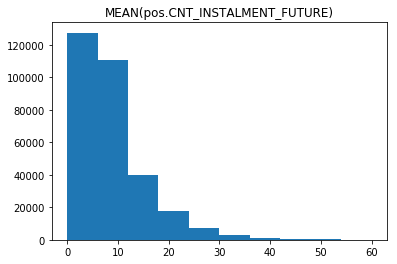

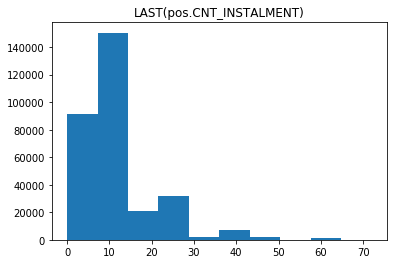

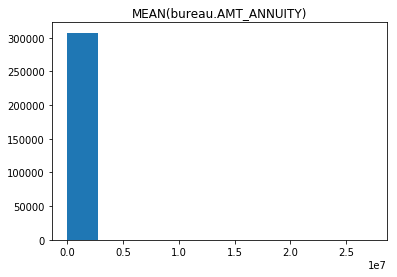

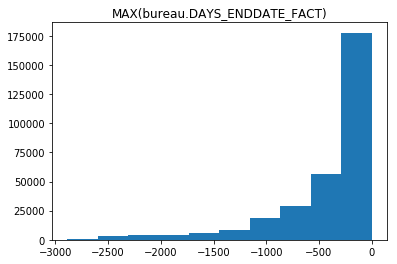

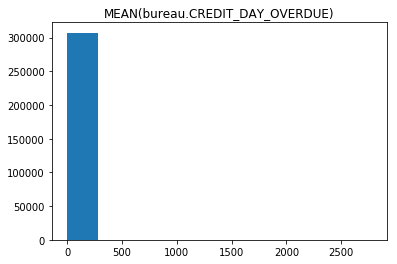

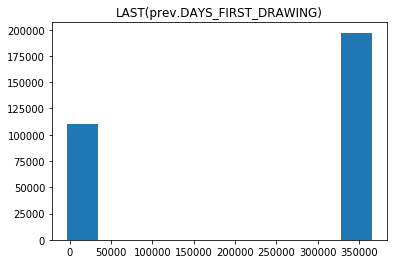

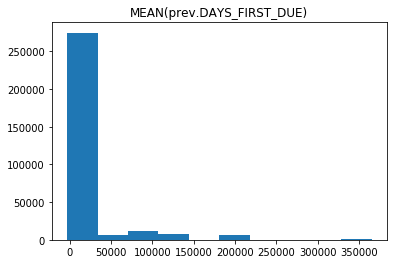

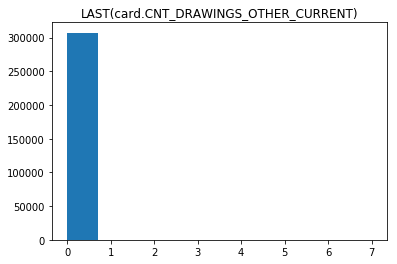

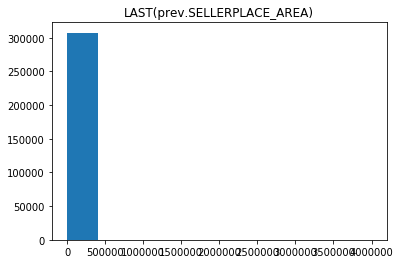

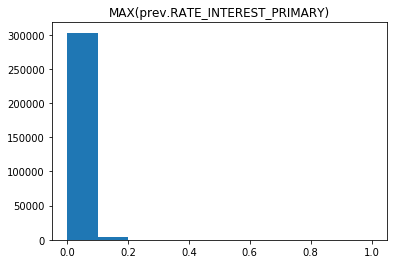

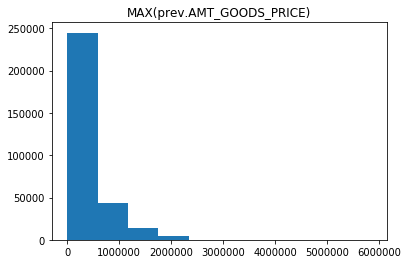

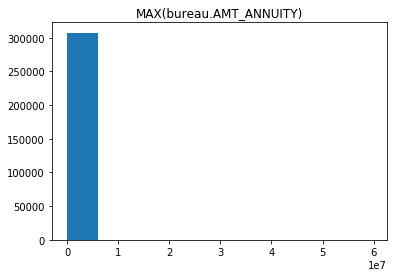

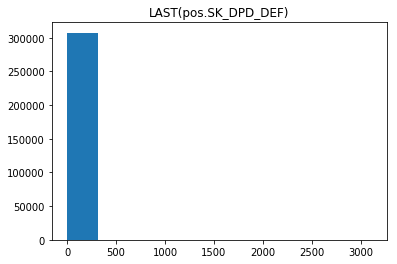

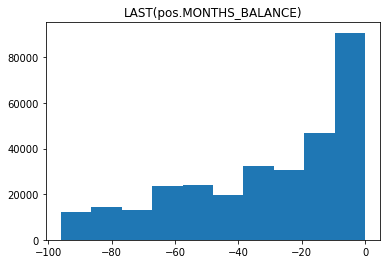

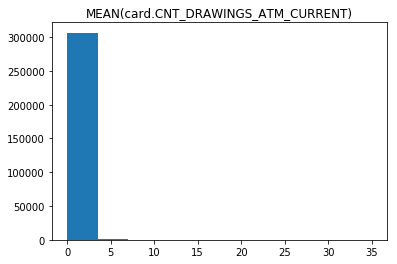

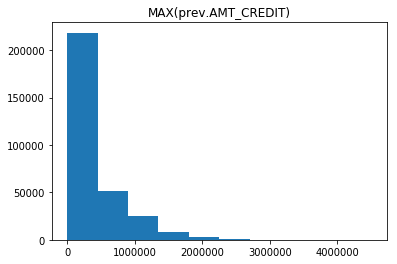

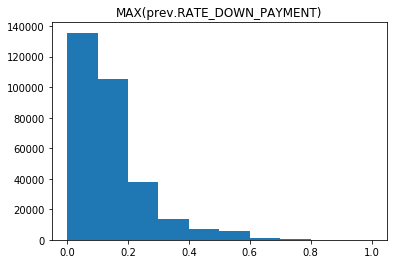

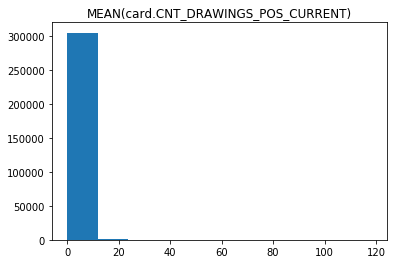

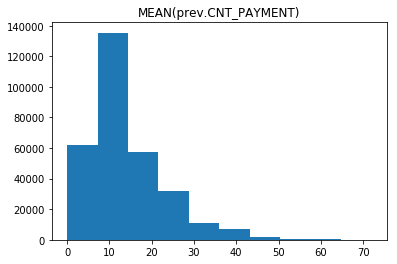

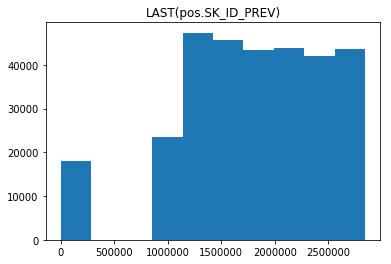

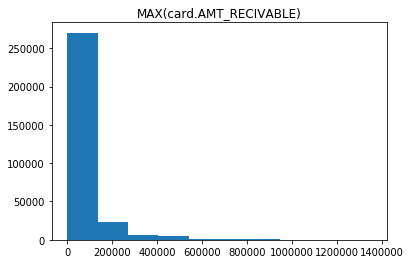

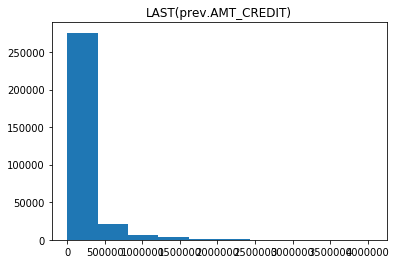

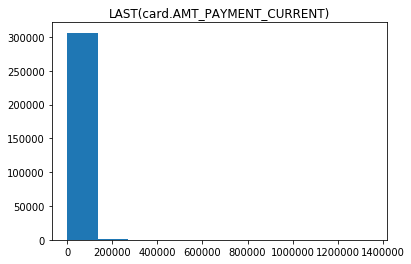

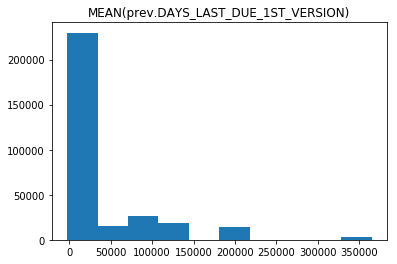

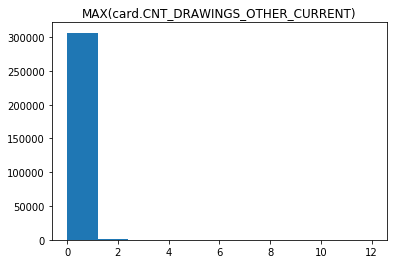

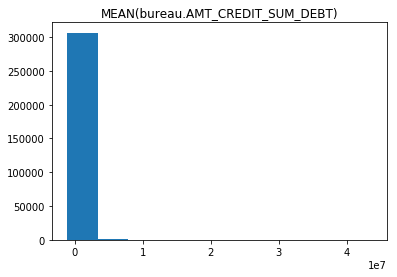

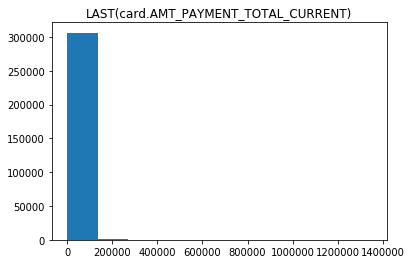

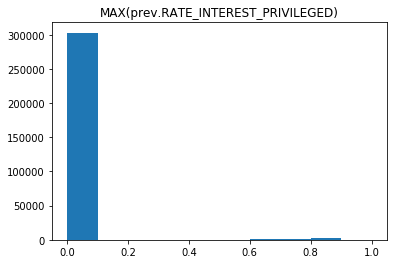

In [19]:
for col in features_train_num.columns:
    
    plt.hist( features_train_num[col].values )
    plt.title(col)
    plt.show()
    

In [20]:
features_train_num2 = features_train_num.apply(  rank_gauss )

In [21]:
features_test_num2 = features_test_num.apply( rank_gauss )

In [22]:
s = features_train_num.shape[0]
for col in features_train_num.columns:
    #plt.hist( features_train_num2[col].values )
    print( col )
    zeros = np.count_nonzero( features_train_num[col].values )
    print( "Ratios nonzeros/total" , zeros/s )
    #plt.title( fn )
    #plt.show()

LIVINGAPARTMENTS_MODE
('Ratios nonzeros/total', 0.31476272393507876)
REGION_RATING_CLIENT
('Ratios nonzeros/total', 1.0)
EXT_SOURCE_1
('Ratios nonzeros/total', 0.4361892745300168)
APARTMENTS_MODE
('Ratios nonzeros/total', 0.4893288370172124)
REG_CITY_NOT_LIVE_CITY
('Ratios nonzeros/total', 0.07817281333025486)
LIVE_CITY_NOT_WORK_CITY
('Ratios nonzeros/total', 0.17955455252007246)
REG_CITY_NOT_WORK_CITY
('Ratios nonzeros/total', 0.23045354475124466)
DAYS_ID_PUBLISH
('Ratios nonzeros/total', 0.9999479693409341)
ELEVATORS_AVG
('Ratios nonzeros/total', 0.18829245132694442)
ENTRANCES_MEDI
('Ratios nonzeros/total', 0.4954424394574503)
APARTMENTS_AVG
('Ratios nonzeros/total', 0.490060518160326)
YEARS_BUILD_MEDI
('Ratios nonzeros/total', 0.33469371827349265)
OWN_CAR_AGE
('Ratios nonzeros/total', 0.33315230999866674)
FLOORSMAX_MODE
('Ratios nonzeros/total', 0.4912864905645652)
DAYS_EMPLOYED
('Ratios nonzeros/total', 0.9999934961676168)
NONLIVINGAREA_AVG
('Ratios nonzeros/total', 0.2572070592596

('Ratios nonzeros/total', 0.6770847221725401)
MAX(card.AMT_PAYMENT_CURRENT)
('Ratios nonzeros/total', 0.19814250547134898)
MAX(card.CNT_DRAWINGS_ATM_CURRENT)
('Ratios nonzeros/total', 0.16678427763559678)
LAST(card.AMT_RECIVABLE)
('Ratios nonzeros/total', 0.12506544481335627)
MEAN(bureau.DAYS_ENDDATE_FACT)
('Ratios nonzeros/total', 0.749085398571108)
MEAN(card.CNT_DRAWINGS_OTHER_CURRENT)
('Ratios nonzeros/total', 0.018535922292210686)
MEAN(pos.MONTHS_BALANCE)
('Ratios nonzeros/total', 0.9412476301660754)
MAX(bureau.DAYS_CREDIT_ENDDATE)
('Ratios nonzeros/total', 0.8491338521223631)
LAST(card.CNT_DRAWINGS_POS_CURRENT)
('Ratios nonzeros/total', 0.04384233409536569)
LAST(prev.CNT_PAYMENT)
('Ratios nonzeros/total', 0.7217790583101092)
LAST(card.SK_DPD_DEF)
('Ratios nonzeros/total', 0.0029039611591130075)
MEAN(bureau.AMT_CREDIT_SUM_OVERDUE)
('Ratios nonzeros/total', 0.010841888582847443)
LAST(prev.NFLAG_LAST_APPL_IN_DAY)
('Ratios nonzeros/total', 0.9441223240794638)
MAX(pos.SK_ID_PREV)
('Rat

In [23]:
features_train_num_sp = scipy.sparse.csr_matrix(features_train_num2.values)
features_test_num_sp = scipy.sparse.csr_matrix(features_test_num2.values)


In [41]:
features_test_cat.head()

,NAME_INCOME_TYPE,EMERGENCYSTATE_MODE,OCCUPATION_TYPE,NAME_TYPE_SUITE,FONDKAPREMONT_MODE,FLAG_OWN_CAR,WEEKDAY_APPR_PROCESS_START,CODE_GENDER,FLAG_OWN_REALTY,NAME_FAMILY_STATUS,...,LAST(prev.NAME_PAYMENT_TYPE),LAST(prev.CHANNEL_TYPE),LAST(prev.PRODUCT_COMBINATION),LAST(prev.NAME_CONTRACT_TYPE),FLAG_PHONE,FLAG_WORK_PHONE,FLAG_EMP_PHONE,FLAG_EMAIL,FLAG_CONT_MOBILE,FLAG_MOBIL
0,7,1,0,7,0,0,5,0,1,1,...,1,5,14,2,0,0,1,1,1,1
1,7,0,10,7,0,0,0,1,1,1,...,1,5,14,2,0,0,1,0,1,1
2,7,0,5,0,0,1,1,1,1,1,...,1,8,14,2,0,0,1,0,1,1
3,7,1,15,7,3,0,6,0,1,1,...,1,5,11,2,1,0,1,0,1,1
4,7,0,0,7,0,1,0,1,0,1,...,4,5,14,2,0,1,1,0,1,1


In [42]:
#features_train_t = hstack( [ onehot_train , features_train_num_sp ]   )
#features_test_t = hstack( [ onehot_test , features_test_num_sp ]   )

features_train_t = pd.concat( [ features_train_cat , features_train_num2 ] , axis = 1 )
features_test_t = pd.concat( [ features_test_cat , features_test_num2 ] , axis = 1 )

In [54]:
#pd.DataFrame( features_train_t.todense() ).to_csv("../data/sparse/train2.csv" , index = False )
features_train_t.to_csv("../data/sparse/train2.csv" , index = False) 

In [55]:
#pd.DataFrame( features_test_t.todense() ).to_csv("../data/sparse/test2.csv" , index = False )
features_test_t.to_csv("../data/sparse/test2.csv" , index = False) 

In [27]:
scipy.sparse.save_npz("../data/features_train_onehot.bin", features_train_t , compressed=True)
scipy.sparse.save_npz("../data/features_test_onehot.bin", features_test_t , compressed=True)

In [28]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

In [29]:
x_train , x_val , y_train , y_val = train_test_split( features_train_t , labels_train , test_size = 0.3 , random_state=42)

In [30]:
x_train.shape

(215257, 599)

(10, 613)

In [31]:
#y_val.sum()/y_val.shape[0]

In [47]:
#lgb_train = lgb.Dataset( x_train , y_train)
#lgb_eval = lgb.Dataset(x_test, y_test, reference=lgb_train)
learning_rate = 0.1
num_leaves = 15
min_data_in_leaf = 2000
feature_fraction = 0.8
num_boost_round = 10000
params = {"objective": "binary",
          "boosting_type": "gbdt",
          "learning_rate": learning_rate,
          "metric":["auc" ,"binary_logloss"] , 
          "num_leaves": num_leaves,
           "max_bin": 256,
          "feature_fraction": feature_fraction,
          "verbosity": 0,
          "drop_rate": 0.1,
          "is_unbalance": False,
          "max_drop": 50,
          "min_child_samples": 10,
          "min_child_weight": 150,
          "min_split_gain": 0,
          "subsample": 0.9 , 
}


In [48]:
NFOLDS = 5
kfold = StratifiedKFold(n_splits=NFOLDS, shuffle=True, random_state=218)

X = features_train_t.values
X_test = features_test_t.values


final_cv_train = np.zeros(len(labels_train))
final_cv_pred = np.zeros(len( test_ids ))
x_score = []
for s in range(16):
    cv_train = np.zeros(len(labels_train))
    cv_pred = np.zeros(len(test_ids))

    params['seed'] = s

    if True:
        kf = kfold.split( X ,   labels_train )

        best_trees = []
        fold_scores = []

        for i, (train_fold, validate) in enumerate(kf):
            X_train, X_validate, label_train, label_validate = X[train_fold, :], X[validate, :], labels_train[train_fold], labels_train[validate]
            dtrain = lgb.Dataset(X_train, label_train ,  categorical_feature= range(43))
            dvalid = lgb.Dataset(X_validate, label_validate, reference=dtrain , categorical_feature=range(43))
            bst = lgb.train(params, dtrain, num_boost_round, valid_sets=dvalid , verbose_eval=100,early_stopping_rounds=100)
            best_trees.append(bst.best_iteration)
            cv_pred += bst.predict(X_test, num_iteration=bst.best_iteration)
            cv_train[validate] += bst.predict(X_validate)
            
            
            score = roc_auc_score( label_validate, cv_train[validate] )
            print( score )
            fold_scores.append(score)

        cv_pred /= NFOLDS
        final_cv_train += cv_train
        final_cv_pred += cv_pred

        print("cv score:")
        print( roc_auc_score(labels_train, cv_train))
        print( "current score:", roc_auc_score( labels_train , final_cv_train / (s + 1.)), s+1)
        print(fold_scores)
        print(best_trees, np.mean(best_trees))

        x_score.append(roc_auc_score( labels_train , cv_train))

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_logloss: 0.243063	valid_0's auc: 0.76991
[200]	valid_0's binary_logloss: 0.240643	valid_0's auc: 0.776608
[300]	valid_0's binary_logloss: 0.240231	valid_0's auc: 0.777553
[400]	valid_0's binary_logloss: 0.2403	valid_0's auc: 0.777238
Early stopping, best iteration is:
[323]	valid_0's binary_logloss: 0.240139	valid_0's auc: 0.777815
0.7778146769150656
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_logloss: 0.242709	valid_0's auc: 0.771226
[200]	valid_0's binary_logloss: 0.240292	valid_0's auc: 0.777929
[300]	valid_0's binary_logloss: 0.239748	valid_0's auc: 0.779415
[400]	valid_0's binary_logloss: 0.239731	valid_0's auc: 0.779402
Early stopping, best iteration is:
[356]	valid_0's binary_logloss: 0.239593	valid_0's auc: 0.779993
0.7799927222841405
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_logloss: 0.243253	valid_0's auc: 

0.7800717764682117
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_logloss: 0.243074	valid_0's auc: 0.771665
[200]	valid_0's binary_logloss: 0.240883	valid_0's auc: 0.777328
[300]	valid_0's binary_logloss: 0.240345	valid_0's auc: 0.77854
[400]	valid_0's binary_logloss: 0.24048	valid_0's auc: 0.777955
Early stopping, best iteration is:
[305]	valid_0's binary_logloss: 0.240324	valid_0's auc: 0.778583
0.7785827605770239
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_logloss: 0.242681	valid_0's auc: 0.770005
[200]	valid_0's binary_logloss: 0.240803	valid_0's auc: 0.775129
[300]	valid_0's binary_logloss: 0.240642	valid_0's auc: 0.775486
[400]	valid_0's binary_logloss: 0.240416	valid_0's auc: 0.776149
[500]	valid_0's binary_logloss: 0.240376	valid_0's auc: 0.776244
Early stopping, best iteration is:
[439]	valid_0's binary_logloss: 0.240339	valid_0's auc: 0.776515
0.7765148974886394
Training until validation scores d

0.7764771569620272
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_logloss: 0.24256	valid_0's auc: 0.772618
[200]	valid_0's binary_logloss: 0.240214	valid_0's auc: 0.778755
[300]	valid_0's binary_logloss: 0.23991	valid_0's auc: 0.779275
Early stopping, best iteration is:
[254]	valid_0's binary_logloss: 0.239871	valid_0's auc: 0.779696
0.7796961809233964
cv score:
0.7783597188697668
('current score:', 0.7807350177033936, 7)
[0.7772511475051027, 0.7798605164428054, 0.7786259765793209, 0.7764771569620272, 0.7796961809233964]
([338, 349, 345, 263, 254], 309.8)
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_logloss: 0.24324	valid_0's auc: 0.769277
[200]	valid_0's binary_logloss: 0.241004	valid_0's auc: 0.775384
[300]	valid_0's binary_logloss: 0.240579	valid_0's auc: 0.776087
[400]	valid_0's binary_logloss: 0.240626	valid_0's auc: 0.776065
Early stopping, best iteration is:
[312]	valid_0's binary_logloss: 0.240497	v

[100]	valid_0's binary_logloss: 0.242795	valid_0's auc: 0.771377
[200]	valid_0's binary_logloss: 0.240188	valid_0's auc: 0.778748
[300]	valid_0's binary_logloss: 0.239746	valid_0's auc: 0.780248
[400]	valid_0's binary_logloss: 0.239638	valid_0's auc: 0.780653
[500]	valid_0's binary_logloss: 0.239661	valid_0's auc: 0.780749
Early stopping, best iteration is:
[433]	valid_0's binary_logloss: 0.239503	valid_0's auc: 0.781146
0.7811462201200718
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_logloss: 0.2432	valid_0's auc: 0.771405
[200]	valid_0's binary_logloss: 0.240858	valid_0's auc: 0.77762
[300]	valid_0's binary_logloss: 0.240377	valid_0's auc: 0.778913
[400]	valid_0's binary_logloss: 0.240384	valid_0's auc: 0.778624
Early stopping, best iteration is:
[332]	valid_0's binary_logloss: 0.240296	valid_0's auc: 0.779085
0.7790847266806946
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_logloss: 0.242509	valid_0's auc

[200]	valid_0's binary_logloss: 0.240584	valid_0's auc: 0.775755
[300]	valid_0's binary_logloss: 0.240402	valid_0's auc: 0.776248
[400]	valid_0's binary_logloss: 0.240162	valid_0's auc: 0.777207
[500]	valid_0's binary_logloss: 0.240323	valid_0's auc: 0.77669
Early stopping, best iteration is:
[408]	valid_0's binary_logloss: 0.240111	valid_0's auc: 0.777369
0.7773688045121766
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_logloss: 0.242468	valid_0's auc: 0.773032
[200]	valid_0's binary_logloss: 0.240447	valid_0's auc: 0.77867
[300]	valid_0's binary_logloss: 0.239795	valid_0's auc: 0.780161
[400]	valid_0's binary_logloss: 0.23977	valid_0's auc: 0.780083
Early stopping, best iteration is:
[302]	valid_0's binary_logloss: 0.239785	valid_0's auc: 0.780183
0.7801832061389594
cv score:
0.7784257944108723
('current score:', 0.7809132940011035, 14)
[0.776101421258014, 0.7800871769115327, 0.778506371100703, 0.7773688045121766, 0.7801832061389594]
([257, 410,

In [49]:
print( x_score )

[0.7787393286580417, 0.7781880162545742, 0.7782925086231669, 0.7783746671148776, 0.7784843723173782, 0.7780900650791291, 0.7783597188697668, 0.7780500682422827, 0.7783657476428516, 0.7780228495601313, 0.778736890530324, 0.7783049197049803, 0.7786470230806123, 0.7784257944108723, 0.7784849589785011, 0.7784443940051726]


In [50]:
print( np.array(x_score).mean() )

0.7783757076920415


In [51]:
preds = final_cv_pred / 16.0

In [52]:
preds

array([0.07528811, 0.17580486, 0.03929072, ..., 0.01837747, 0.04120749,
       0.22695018])

In [19]:
df_preds_nn = pd.read_csv("../data/preds_nn.csv" )

In [20]:
df_preds_nn.head()

,Unnamed: 0,index,preds
0,0,0,0.000089
1,1,1,0.077871
2,2,2,0.000748
3,3,3,0.006218
4,4,4,0.022741


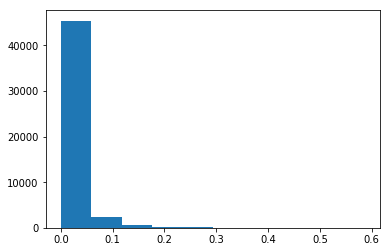

In [21]:
plt.hist( df_preds_nn["preds"].values)
plt.show()

In [22]:
pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': df_preds_nn["preds"].values }).to_csv('../data/nn_pred.csv', index=False)

In [139]:

best_trees

[247, 341, 449, 402, 420]

In [140]:
x_train , x_val , y_train , y_val = train_test_split( features_train_t , labels_train , test_size = 0.3 , random_state=42)

In [141]:
dtrain = lgb.Dataset( x_train, y_train)
dvalid = lgb.Dataset( x_val , y_val, reference=dtrain)
bst = lgb.train(params, dtrain, num_boost_round, valid_sets=dvalid , verbose_eval=100,early_stopping_rounds=100)

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_logloss: 0.560429	valid_0's auc: 0.772108
[200]	valid_0's binary_logloss: 0.544511	valid_0's auc: 0.776303
[300]	valid_0's binary_logloss: 0.533093	valid_0's auc: 0.77698
[400]	valid_0's binary_logloss: 0.522458	valid_0's auc: 0.777467
[500]	valid_0's binary_logloss: 0.513355	valid_0's auc: 0.777067
Early stopping, best iteration is:
[403]	valid_0's binary_logloss: 0.522161	valid_0's auc: 0.777499


Plot feature importances...


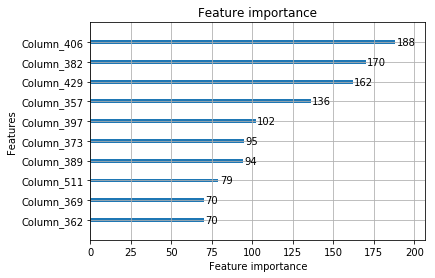

In [39]:
print('Plot feature importances...')
ax = lgb.plot_importance( bst , max_num_features=10)
plt.show()